# DETECTION AND RECONITION OF CRACKS ON WALL SURFACE


# HPID 49


### Yash Lunkad              Roll no: 10 

### Omkar Maindre          Roll no: 15 

## IMPORTING REQUIRED LIBRARIES 

In [1]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import argparse
import cv2
import os
# Local Binary Pattern function
from skimage.feature import local_binary_pattern
# To calculate a normalized histogram 
from scipy.stats import itemfreq
from sklearn.preprocessing import normalize
import numpy as np
import csv
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics

## POSITIVE TRAINING IMAGES 

# GABOR FILTER

#### GABOR VERTICAL KERNEL 

In [11]:
# GABOR VERTICAL KERNEL
def gabor_vertical(folder_name):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
        #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
        sigma = 2 #Large sigma on small features will fully miss the features. 
        theta = 2*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
        lamda = 1*np.pi /4  #1/4 works best for angled. 
        gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
        #Value of 1, spherical may not be ideal as it picks up features from other regions. 
        phi = 0  #Phase offset. I leave it to 0. 
        
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
        name = 'C:\\Users\\yashl\\gabor\\' + str(currentframe) + '.png'
        print ('Creating...' + name)
    
        cv2.imwrite(name, fimg)
        currentframe=currentframe+1;
        i=i+1
        if i==3000:
            break;

In [12]:
gabor_vertical("D:\dataset\Positive")

Creating...C:\Users\yashl\gabor\1.png
Creating...C:\Users\yashl\gabor\2.png
Creating...C:\Users\yashl\gabor\3.png
Creating...C:\Users\yashl\gabor\4.png
Creating...C:\Users\yashl\gabor\5.png
Creating...C:\Users\yashl\gabor\6.png
Creating...C:\Users\yashl\gabor\7.png
Creating...C:\Users\yashl\gabor\8.png
Creating...C:\Users\yashl\gabor\9.png
Creating...C:\Users\yashl\gabor\10.png
Creating...C:\Users\yashl\gabor\11.png
Creating...C:\Users\yashl\gabor\12.png
Creating...C:\Users\yashl\gabor\13.png
Creating...C:\Users\yashl\gabor\14.png
Creating...C:\Users\yashl\gabor\15.png
Creating...C:\Users\yashl\gabor\16.png
Creating...C:\Users\yashl\gabor\17.png
Creating...C:\Users\yashl\gabor\18.png
Creating...C:\Users\yashl\gabor\19.png
Creating...C:\Users\yashl\gabor\20.png
Creating...C:\Users\yashl\gabor\21.png
Creating...C:\Users\yashl\gabor\22.png
Creating...C:\Users\yashl\gabor\23.png
Creating...C:\Users\yashl\gabor\24.png
Creating...C:\Users\yashl\gabor\25.png
Creating...C:\Users\yashl\gabor\26

Creating...C:\Users\yashl\gabor\217.png
Creating...C:\Users\yashl\gabor\218.png
Creating...C:\Users\yashl\gabor\219.png
Creating...C:\Users\yashl\gabor\220.png
Creating...C:\Users\yashl\gabor\221.png
Creating...C:\Users\yashl\gabor\222.png
Creating...C:\Users\yashl\gabor\223.png
Creating...C:\Users\yashl\gabor\224.png
Creating...C:\Users\yashl\gabor\225.png
Creating...C:\Users\yashl\gabor\226.png
Creating...C:\Users\yashl\gabor\227.png
Creating...C:\Users\yashl\gabor\228.png
Creating...C:\Users\yashl\gabor\229.png
Creating...C:\Users\yashl\gabor\230.png
Creating...C:\Users\yashl\gabor\231.png
Creating...C:\Users\yashl\gabor\232.png
Creating...C:\Users\yashl\gabor\233.png
Creating...C:\Users\yashl\gabor\234.png
Creating...C:\Users\yashl\gabor\235.png
Creating...C:\Users\yashl\gabor\236.png
Creating...C:\Users\yashl\gabor\237.png
Creating...C:\Users\yashl\gabor\238.png
Creating...C:\Users\yashl\gabor\239.png
Creating...C:\Users\yashl\gabor\240.png
Creating...C:\Users\yashl\gabor\241.png


Creating...C:\Users\yashl\gabor\441.png
Creating...C:\Users\yashl\gabor\442.png
Creating...C:\Users\yashl\gabor\443.png
Creating...C:\Users\yashl\gabor\444.png
Creating...C:\Users\yashl\gabor\445.png
Creating...C:\Users\yashl\gabor\446.png
Creating...C:\Users\yashl\gabor\447.png
Creating...C:\Users\yashl\gabor\448.png
Creating...C:\Users\yashl\gabor\449.png
Creating...C:\Users\yashl\gabor\450.png
Creating...C:\Users\yashl\gabor\451.png
Creating...C:\Users\yashl\gabor\452.png
Creating...C:\Users\yashl\gabor\453.png
Creating...C:\Users\yashl\gabor\454.png
Creating...C:\Users\yashl\gabor\455.png
Creating...C:\Users\yashl\gabor\456.png
Creating...C:\Users\yashl\gabor\457.png
Creating...C:\Users\yashl\gabor\458.png
Creating...C:\Users\yashl\gabor\459.png
Creating...C:\Users\yashl\gabor\460.png
Creating...C:\Users\yashl\gabor\461.png
Creating...C:\Users\yashl\gabor\462.png
Creating...C:\Users\yashl\gabor\463.png
Creating...C:\Users\yashl\gabor\464.png
Creating...C:\Users\yashl\gabor\465.png


Creating...C:\Users\yashl\gabor\650.png
Creating...C:\Users\yashl\gabor\651.png
Creating...C:\Users\yashl\gabor\652.png
Creating...C:\Users\yashl\gabor\653.png
Creating...C:\Users\yashl\gabor\654.png
Creating...C:\Users\yashl\gabor\655.png
Creating...C:\Users\yashl\gabor\656.png
Creating...C:\Users\yashl\gabor\657.png
Creating...C:\Users\yashl\gabor\658.png
Creating...C:\Users\yashl\gabor\659.png
Creating...C:\Users\yashl\gabor\660.png
Creating...C:\Users\yashl\gabor\661.png
Creating...C:\Users\yashl\gabor\662.png
Creating...C:\Users\yashl\gabor\663.png
Creating...C:\Users\yashl\gabor\664.png
Creating...C:\Users\yashl\gabor\665.png
Creating...C:\Users\yashl\gabor\666.png
Creating...C:\Users\yashl\gabor\667.png
Creating...C:\Users\yashl\gabor\668.png
Creating...C:\Users\yashl\gabor\669.png
Creating...C:\Users\yashl\gabor\670.png
Creating...C:\Users\yashl\gabor\671.png
Creating...C:\Users\yashl\gabor\672.png
Creating...C:\Users\yashl\gabor\673.png
Creating...C:\Users\yashl\gabor\674.png


Creating...C:\Users\yashl\gabor\878.png
Creating...C:\Users\yashl\gabor\879.png
Creating...C:\Users\yashl\gabor\880.png
Creating...C:\Users\yashl\gabor\881.png
Creating...C:\Users\yashl\gabor\882.png
Creating...C:\Users\yashl\gabor\883.png
Creating...C:\Users\yashl\gabor\884.png
Creating...C:\Users\yashl\gabor\885.png
Creating...C:\Users\yashl\gabor\886.png
Creating...C:\Users\yashl\gabor\887.png
Creating...C:\Users\yashl\gabor\888.png
Creating...C:\Users\yashl\gabor\889.png
Creating...C:\Users\yashl\gabor\890.png
Creating...C:\Users\yashl\gabor\891.png
Creating...C:\Users\yashl\gabor\892.png
Creating...C:\Users\yashl\gabor\893.png
Creating...C:\Users\yashl\gabor\894.png
Creating...C:\Users\yashl\gabor\895.png
Creating...C:\Users\yashl\gabor\896.png
Creating...C:\Users\yashl\gabor\897.png
Creating...C:\Users\yashl\gabor\898.png
Creating...C:\Users\yashl\gabor\899.png
Creating...C:\Users\yashl\gabor\900.png
Creating...C:\Users\yashl\gabor\901.png
Creating...C:\Users\yashl\gabor\902.png


Creating...C:\Users\yashl\gabor\1110.png
Creating...C:\Users\yashl\gabor\1111.png
Creating...C:\Users\yashl\gabor\1112.png
Creating...C:\Users\yashl\gabor\1113.png
Creating...C:\Users\yashl\gabor\1114.png
Creating...C:\Users\yashl\gabor\1115.png
Creating...C:\Users\yashl\gabor\1116.png
Creating...C:\Users\yashl\gabor\1117.png
Creating...C:\Users\yashl\gabor\1118.png
Creating...C:\Users\yashl\gabor\1119.png
Creating...C:\Users\yashl\gabor\1120.png
Creating...C:\Users\yashl\gabor\1121.png
Creating...C:\Users\yashl\gabor\1122.png
Creating...C:\Users\yashl\gabor\1123.png
Creating...C:\Users\yashl\gabor\1124.png
Creating...C:\Users\yashl\gabor\1125.png
Creating...C:\Users\yashl\gabor\1126.png
Creating...C:\Users\yashl\gabor\1127.png
Creating...C:\Users\yashl\gabor\1128.png
Creating...C:\Users\yashl\gabor\1129.png
Creating...C:\Users\yashl\gabor\1130.png
Creating...C:\Users\yashl\gabor\1131.png
Creating...C:\Users\yashl\gabor\1132.png
Creating...C:\Users\yashl\gabor\1133.png
Creating...C:\Us

Creating...C:\Users\yashl\gabor\1354.png
Creating...C:\Users\yashl\gabor\1355.png
Creating...C:\Users\yashl\gabor\1356.png
Creating...C:\Users\yashl\gabor\1357.png
Creating...C:\Users\yashl\gabor\1358.png
Creating...C:\Users\yashl\gabor\1359.png
Creating...C:\Users\yashl\gabor\1360.png
Creating...C:\Users\yashl\gabor\1361.png
Creating...C:\Users\yashl\gabor\1362.png
Creating...C:\Users\yashl\gabor\1363.png
Creating...C:\Users\yashl\gabor\1364.png
Creating...C:\Users\yashl\gabor\1365.png
Creating...C:\Users\yashl\gabor\1366.png
Creating...C:\Users\yashl\gabor\1367.png
Creating...C:\Users\yashl\gabor\1368.png
Creating...C:\Users\yashl\gabor\1369.png
Creating...C:\Users\yashl\gabor\1370.png
Creating...C:\Users\yashl\gabor\1371.png
Creating...C:\Users\yashl\gabor\1372.png
Creating...C:\Users\yashl\gabor\1373.png
Creating...C:\Users\yashl\gabor\1374.png
Creating...C:\Users\yashl\gabor\1375.png
Creating...C:\Users\yashl\gabor\1376.png
Creating...C:\Users\yashl\gabor\1377.png
Creating...C:\Us

Creating...C:\Users\yashl\gabor\1567.png
Creating...C:\Users\yashl\gabor\1568.png
Creating...C:\Users\yashl\gabor\1569.png
Creating...C:\Users\yashl\gabor\1570.png
Creating...C:\Users\yashl\gabor\1571.png
Creating...C:\Users\yashl\gabor\1572.png
Creating...C:\Users\yashl\gabor\1573.png
Creating...C:\Users\yashl\gabor\1574.png
Creating...C:\Users\yashl\gabor\1575.png
Creating...C:\Users\yashl\gabor\1576.png
Creating...C:\Users\yashl\gabor\1577.png
Creating...C:\Users\yashl\gabor\1578.png
Creating...C:\Users\yashl\gabor\1579.png
Creating...C:\Users\yashl\gabor\1580.png
Creating...C:\Users\yashl\gabor\1581.png
Creating...C:\Users\yashl\gabor\1582.png
Creating...C:\Users\yashl\gabor\1583.png
Creating...C:\Users\yashl\gabor\1584.png
Creating...C:\Users\yashl\gabor\1585.png
Creating...C:\Users\yashl\gabor\1586.png
Creating...C:\Users\yashl\gabor\1587.png
Creating...C:\Users\yashl\gabor\1588.png
Creating...C:\Users\yashl\gabor\1589.png
Creating...C:\Users\yashl\gabor\1590.png
Creating...C:\Us

Creating...C:\Users\yashl\gabor\1797.png
Creating...C:\Users\yashl\gabor\1798.png
Creating...C:\Users\yashl\gabor\1799.png
Creating...C:\Users\yashl\gabor\1800.png
Creating...C:\Users\yashl\gabor\1801.png
Creating...C:\Users\yashl\gabor\1802.png
Creating...C:\Users\yashl\gabor\1803.png
Creating...C:\Users\yashl\gabor\1804.png
Creating...C:\Users\yashl\gabor\1805.png
Creating...C:\Users\yashl\gabor\1806.png
Creating...C:\Users\yashl\gabor\1807.png
Creating...C:\Users\yashl\gabor\1808.png
Creating...C:\Users\yashl\gabor\1809.png
Creating...C:\Users\yashl\gabor\1810.png
Creating...C:\Users\yashl\gabor\1811.png
Creating...C:\Users\yashl\gabor\1812.png
Creating...C:\Users\yashl\gabor\1813.png
Creating...C:\Users\yashl\gabor\1814.png
Creating...C:\Users\yashl\gabor\1815.png
Creating...C:\Users\yashl\gabor\1816.png
Creating...C:\Users\yashl\gabor\1817.png
Creating...C:\Users\yashl\gabor\1818.png
Creating...C:\Users\yashl\gabor\1819.png
Creating...C:\Users\yashl\gabor\1820.png
Creating...C:\Us

Creating...C:\Users\yashl\gabor\2007.png
Creating...C:\Users\yashl\gabor\2008.png
Creating...C:\Users\yashl\gabor\2009.png
Creating...C:\Users\yashl\gabor\2010.png
Creating...C:\Users\yashl\gabor\2011.png
Creating...C:\Users\yashl\gabor\2012.png
Creating...C:\Users\yashl\gabor\2013.png
Creating...C:\Users\yashl\gabor\2014.png
Creating...C:\Users\yashl\gabor\2015.png
Creating...C:\Users\yashl\gabor\2016.png
Creating...C:\Users\yashl\gabor\2017.png
Creating...C:\Users\yashl\gabor\2018.png
Creating...C:\Users\yashl\gabor\2019.png
Creating...C:\Users\yashl\gabor\2020.png
Creating...C:\Users\yashl\gabor\2021.png
Creating...C:\Users\yashl\gabor\2022.png
Creating...C:\Users\yashl\gabor\2023.png
Creating...C:\Users\yashl\gabor\2024.png
Creating...C:\Users\yashl\gabor\2025.png
Creating...C:\Users\yashl\gabor\2026.png
Creating...C:\Users\yashl\gabor\2027.png
Creating...C:\Users\yashl\gabor\2028.png
Creating...C:\Users\yashl\gabor\2029.png
Creating...C:\Users\yashl\gabor\2030.png
Creating...C:\Us

Creating...C:\Users\yashl\gabor\2255.png
Creating...C:\Users\yashl\gabor\2256.png
Creating...C:\Users\yashl\gabor\2257.png
Creating...C:\Users\yashl\gabor\2258.png
Creating...C:\Users\yashl\gabor\2259.png
Creating...C:\Users\yashl\gabor\2260.png
Creating...C:\Users\yashl\gabor\2261.png
Creating...C:\Users\yashl\gabor\2262.png
Creating...C:\Users\yashl\gabor\2263.png
Creating...C:\Users\yashl\gabor\2264.png
Creating...C:\Users\yashl\gabor\2265.png
Creating...C:\Users\yashl\gabor\2266.png
Creating...C:\Users\yashl\gabor\2267.png
Creating...C:\Users\yashl\gabor\2268.png
Creating...C:\Users\yashl\gabor\2269.png
Creating...C:\Users\yashl\gabor\2270.png
Creating...C:\Users\yashl\gabor\2271.png
Creating...C:\Users\yashl\gabor\2272.png
Creating...C:\Users\yashl\gabor\2273.png
Creating...C:\Users\yashl\gabor\2274.png
Creating...C:\Users\yashl\gabor\2275.png
Creating...C:\Users\yashl\gabor\2276.png
Creating...C:\Users\yashl\gabor\2277.png
Creating...C:\Users\yashl\gabor\2278.png
Creating...C:\Us

Creating...C:\Users\yashl\gabor\2475.png
Creating...C:\Users\yashl\gabor\2476.png
Creating...C:\Users\yashl\gabor\2477.png
Creating...C:\Users\yashl\gabor\2478.png
Creating...C:\Users\yashl\gabor\2479.png
Creating...C:\Users\yashl\gabor\2480.png
Creating...C:\Users\yashl\gabor\2481.png
Creating...C:\Users\yashl\gabor\2482.png
Creating...C:\Users\yashl\gabor\2483.png
Creating...C:\Users\yashl\gabor\2484.png
Creating...C:\Users\yashl\gabor\2485.png
Creating...C:\Users\yashl\gabor\2486.png
Creating...C:\Users\yashl\gabor\2487.png
Creating...C:\Users\yashl\gabor\2488.png
Creating...C:\Users\yashl\gabor\2489.png
Creating...C:\Users\yashl\gabor\2490.png
Creating...C:\Users\yashl\gabor\2491.png
Creating...C:\Users\yashl\gabor\2492.png
Creating...C:\Users\yashl\gabor\2493.png
Creating...C:\Users\yashl\gabor\2494.png
Creating...C:\Users\yashl\gabor\2495.png
Creating...C:\Users\yashl\gabor\2496.png
Creating...C:\Users\yashl\gabor\2497.png
Creating...C:\Users\yashl\gabor\2498.png
Creating...C:\Us

Creating...C:\Users\yashl\gabor\2732.png
Creating...C:\Users\yashl\gabor\2733.png
Creating...C:\Users\yashl\gabor\2734.png
Creating...C:\Users\yashl\gabor\2735.png
Creating...C:\Users\yashl\gabor\2736.png
Creating...C:\Users\yashl\gabor\2737.png
Creating...C:\Users\yashl\gabor\2738.png
Creating...C:\Users\yashl\gabor\2739.png
Creating...C:\Users\yashl\gabor\2740.png
Creating...C:\Users\yashl\gabor\2741.png
Creating...C:\Users\yashl\gabor\2742.png
Creating...C:\Users\yashl\gabor\2743.png
Creating...C:\Users\yashl\gabor\2744.png
Creating...C:\Users\yashl\gabor\2745.png
Creating...C:\Users\yashl\gabor\2746.png
Creating...C:\Users\yashl\gabor\2747.png
Creating...C:\Users\yashl\gabor\2748.png
Creating...C:\Users\yashl\gabor\2749.png
Creating...C:\Users\yashl\gabor\2750.png
Creating...C:\Users\yashl\gabor\2751.png
Creating...C:\Users\yashl\gabor\2752.png
Creating...C:\Users\yashl\gabor\2753.png
Creating...C:\Users\yashl\gabor\2754.png
Creating...C:\Users\yashl\gabor\2755.png
Creating...C:\Us

Creating...C:\Users\yashl\gabor\2985.png
Creating...C:\Users\yashl\gabor\2986.png
Creating...C:\Users\yashl\gabor\2987.png
Creating...C:\Users\yashl\gabor\2988.png
Creating...C:\Users\yashl\gabor\2989.png
Creating...C:\Users\yashl\gabor\2990.png
Creating...C:\Users\yashl\gabor\2991.png
Creating...C:\Users\yashl\gabor\2992.png
Creating...C:\Users\yashl\gabor\2993.png
Creating...C:\Users\yashl\gabor\2994.png
Creating...C:\Users\yashl\gabor\2995.png
Creating...C:\Users\yashl\gabor\2996.png
Creating...C:\Users\yashl\gabor\2997.png
Creating...C:\Users\yashl\gabor\2998.png
Creating...C:\Users\yashl\gabor\2999.png
Creating...C:\Users\yashl\gabor\3000.png


#### GABOR HORIZONTAL KERNEL 

In [13]:
def gabor_horizontal(folder_name):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
        #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
        sigma = 2 #Large sigma on small features will fully miss the features. 
        theta = 8*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
        lamda = 1*np.pi /4  #1/4 works best for angled. 
        gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
        #Value of 1, spherical may not be ideal as it picks up features from other regions.
        phi = 0  #Phase offset. I leave it to 0.  
        
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
        name = 'C:\\Users\\yashl\\gabor_h\\' + str(currentframe) + '.png'
        print ('Creating...' + name)
    
        cv2.imwrite(name, fimg)
        currentframe=currentframe+1;
        i=i+1
        if i==3000:
            break;

In [15]:
gabor_horizontal("D:\dataset\Positive")

Creating...C:\Users\yashl\gabor_h\1.png
Creating...C:\Users\yashl\gabor_h\2.png
Creating...C:\Users\yashl\gabor_h\3.png
Creating...C:\Users\yashl\gabor_h\4.png
Creating...C:\Users\yashl\gabor_h\5.png
Creating...C:\Users\yashl\gabor_h\6.png
Creating...C:\Users\yashl\gabor_h\7.png
Creating...C:\Users\yashl\gabor_h\8.png
Creating...C:\Users\yashl\gabor_h\9.png
Creating...C:\Users\yashl\gabor_h\10.png
Creating...C:\Users\yashl\gabor_h\11.png
Creating...C:\Users\yashl\gabor_h\12.png
Creating...C:\Users\yashl\gabor_h\13.png
Creating...C:\Users\yashl\gabor_h\14.png
Creating...C:\Users\yashl\gabor_h\15.png
Creating...C:\Users\yashl\gabor_h\16.png
Creating...C:\Users\yashl\gabor_h\17.png
Creating...C:\Users\yashl\gabor_h\18.png
Creating...C:\Users\yashl\gabor_h\19.png
Creating...C:\Users\yashl\gabor_h\20.png
Creating...C:\Users\yashl\gabor_h\21.png
Creating...C:\Users\yashl\gabor_h\22.png
Creating...C:\Users\yashl\gabor_h\23.png
Creating...C:\Users\yashl\gabor_h\24.png
Creating...C:\Users\yashl

Creating...C:\Users\yashl\gabor_h\220.png
Creating...C:\Users\yashl\gabor_h\221.png
Creating...C:\Users\yashl\gabor_h\222.png
Creating...C:\Users\yashl\gabor_h\223.png
Creating...C:\Users\yashl\gabor_h\224.png
Creating...C:\Users\yashl\gabor_h\225.png
Creating...C:\Users\yashl\gabor_h\226.png
Creating...C:\Users\yashl\gabor_h\227.png
Creating...C:\Users\yashl\gabor_h\228.png
Creating...C:\Users\yashl\gabor_h\229.png
Creating...C:\Users\yashl\gabor_h\230.png
Creating...C:\Users\yashl\gabor_h\231.png
Creating...C:\Users\yashl\gabor_h\232.png
Creating...C:\Users\yashl\gabor_h\233.png
Creating...C:\Users\yashl\gabor_h\234.png
Creating...C:\Users\yashl\gabor_h\235.png
Creating...C:\Users\yashl\gabor_h\236.png
Creating...C:\Users\yashl\gabor_h\237.png
Creating...C:\Users\yashl\gabor_h\238.png
Creating...C:\Users\yashl\gabor_h\239.png
Creating...C:\Users\yashl\gabor_h\240.png
Creating...C:\Users\yashl\gabor_h\241.png
Creating...C:\Users\yashl\gabor_h\242.png
Creating...C:\Users\yashl\gabor_h\

Creating...C:\Users\yashl\gabor_h\437.png
Creating...C:\Users\yashl\gabor_h\438.png
Creating...C:\Users\yashl\gabor_h\439.png
Creating...C:\Users\yashl\gabor_h\440.png
Creating...C:\Users\yashl\gabor_h\441.png
Creating...C:\Users\yashl\gabor_h\442.png
Creating...C:\Users\yashl\gabor_h\443.png
Creating...C:\Users\yashl\gabor_h\444.png
Creating...C:\Users\yashl\gabor_h\445.png
Creating...C:\Users\yashl\gabor_h\446.png
Creating...C:\Users\yashl\gabor_h\447.png
Creating...C:\Users\yashl\gabor_h\448.png
Creating...C:\Users\yashl\gabor_h\449.png
Creating...C:\Users\yashl\gabor_h\450.png
Creating...C:\Users\yashl\gabor_h\451.png
Creating...C:\Users\yashl\gabor_h\452.png
Creating...C:\Users\yashl\gabor_h\453.png
Creating...C:\Users\yashl\gabor_h\454.png
Creating...C:\Users\yashl\gabor_h\455.png
Creating...C:\Users\yashl\gabor_h\456.png
Creating...C:\Users\yashl\gabor_h\457.png
Creating...C:\Users\yashl\gabor_h\458.png
Creating...C:\Users\yashl\gabor_h\459.png
Creating...C:\Users\yashl\gabor_h\

Creating...C:\Users\yashl\gabor_h\662.png
Creating...C:\Users\yashl\gabor_h\663.png
Creating...C:\Users\yashl\gabor_h\664.png
Creating...C:\Users\yashl\gabor_h\665.png
Creating...C:\Users\yashl\gabor_h\666.png
Creating...C:\Users\yashl\gabor_h\667.png
Creating...C:\Users\yashl\gabor_h\668.png
Creating...C:\Users\yashl\gabor_h\669.png
Creating...C:\Users\yashl\gabor_h\670.png
Creating...C:\Users\yashl\gabor_h\671.png
Creating...C:\Users\yashl\gabor_h\672.png
Creating...C:\Users\yashl\gabor_h\673.png
Creating...C:\Users\yashl\gabor_h\674.png
Creating...C:\Users\yashl\gabor_h\675.png
Creating...C:\Users\yashl\gabor_h\676.png
Creating...C:\Users\yashl\gabor_h\677.png
Creating...C:\Users\yashl\gabor_h\678.png
Creating...C:\Users\yashl\gabor_h\679.png
Creating...C:\Users\yashl\gabor_h\680.png
Creating...C:\Users\yashl\gabor_h\681.png
Creating...C:\Users\yashl\gabor_h\682.png
Creating...C:\Users\yashl\gabor_h\683.png
Creating...C:\Users\yashl\gabor_h\684.png
Creating...C:\Users\yashl\gabor_h\

Creating...C:\Users\yashl\gabor_h\921.png
Creating...C:\Users\yashl\gabor_h\922.png
Creating...C:\Users\yashl\gabor_h\923.png
Creating...C:\Users\yashl\gabor_h\924.png
Creating...C:\Users\yashl\gabor_h\925.png
Creating...C:\Users\yashl\gabor_h\926.png
Creating...C:\Users\yashl\gabor_h\927.png
Creating...C:\Users\yashl\gabor_h\928.png
Creating...C:\Users\yashl\gabor_h\929.png
Creating...C:\Users\yashl\gabor_h\930.png
Creating...C:\Users\yashl\gabor_h\931.png
Creating...C:\Users\yashl\gabor_h\932.png
Creating...C:\Users\yashl\gabor_h\933.png
Creating...C:\Users\yashl\gabor_h\934.png
Creating...C:\Users\yashl\gabor_h\935.png
Creating...C:\Users\yashl\gabor_h\936.png
Creating...C:\Users\yashl\gabor_h\937.png
Creating...C:\Users\yashl\gabor_h\938.png
Creating...C:\Users\yashl\gabor_h\939.png
Creating...C:\Users\yashl\gabor_h\940.png
Creating...C:\Users\yashl\gabor_h\941.png
Creating...C:\Users\yashl\gabor_h\942.png
Creating...C:\Users\yashl\gabor_h\943.png
Creating...C:\Users\yashl\gabor_h\

Creating...C:\Users\yashl\gabor_h\1145.png
Creating...C:\Users\yashl\gabor_h\1146.png
Creating...C:\Users\yashl\gabor_h\1147.png
Creating...C:\Users\yashl\gabor_h\1148.png
Creating...C:\Users\yashl\gabor_h\1149.png
Creating...C:\Users\yashl\gabor_h\1150.png
Creating...C:\Users\yashl\gabor_h\1151.png
Creating...C:\Users\yashl\gabor_h\1152.png
Creating...C:\Users\yashl\gabor_h\1153.png
Creating...C:\Users\yashl\gabor_h\1154.png
Creating...C:\Users\yashl\gabor_h\1155.png
Creating...C:\Users\yashl\gabor_h\1156.png
Creating...C:\Users\yashl\gabor_h\1157.png
Creating...C:\Users\yashl\gabor_h\1158.png
Creating...C:\Users\yashl\gabor_h\1159.png
Creating...C:\Users\yashl\gabor_h\1160.png
Creating...C:\Users\yashl\gabor_h\1161.png
Creating...C:\Users\yashl\gabor_h\1162.png
Creating...C:\Users\yashl\gabor_h\1163.png
Creating...C:\Users\yashl\gabor_h\1164.png
Creating...C:\Users\yashl\gabor_h\1165.png
Creating...C:\Users\yashl\gabor_h\1166.png
Creating...C:\Users\yashl\gabor_h\1167.png
Creating...

Creating...C:\Users\yashl\gabor_h\1368.png
Creating...C:\Users\yashl\gabor_h\1369.png
Creating...C:\Users\yashl\gabor_h\1370.png
Creating...C:\Users\yashl\gabor_h\1371.png
Creating...C:\Users\yashl\gabor_h\1372.png
Creating...C:\Users\yashl\gabor_h\1373.png
Creating...C:\Users\yashl\gabor_h\1374.png
Creating...C:\Users\yashl\gabor_h\1375.png
Creating...C:\Users\yashl\gabor_h\1376.png
Creating...C:\Users\yashl\gabor_h\1377.png
Creating...C:\Users\yashl\gabor_h\1378.png
Creating...C:\Users\yashl\gabor_h\1379.png
Creating...C:\Users\yashl\gabor_h\1380.png
Creating...C:\Users\yashl\gabor_h\1381.png
Creating...C:\Users\yashl\gabor_h\1382.png
Creating...C:\Users\yashl\gabor_h\1383.png
Creating...C:\Users\yashl\gabor_h\1384.png
Creating...C:\Users\yashl\gabor_h\1385.png
Creating...C:\Users\yashl\gabor_h\1386.png
Creating...C:\Users\yashl\gabor_h\1387.png
Creating...C:\Users\yashl\gabor_h\1388.png
Creating...C:\Users\yashl\gabor_h\1389.png
Creating...C:\Users\yashl\gabor_h\1390.png
Creating...

Creating...C:\Users\yashl\gabor_h\1564.png
Creating...C:\Users\yashl\gabor_h\1565.png
Creating...C:\Users\yashl\gabor_h\1566.png
Creating...C:\Users\yashl\gabor_h\1567.png
Creating...C:\Users\yashl\gabor_h\1568.png
Creating...C:\Users\yashl\gabor_h\1569.png
Creating...C:\Users\yashl\gabor_h\1570.png
Creating...C:\Users\yashl\gabor_h\1571.png
Creating...C:\Users\yashl\gabor_h\1572.png
Creating...C:\Users\yashl\gabor_h\1573.png
Creating...C:\Users\yashl\gabor_h\1574.png
Creating...C:\Users\yashl\gabor_h\1575.png
Creating...C:\Users\yashl\gabor_h\1576.png
Creating...C:\Users\yashl\gabor_h\1577.png
Creating...C:\Users\yashl\gabor_h\1578.png
Creating...C:\Users\yashl\gabor_h\1579.png
Creating...C:\Users\yashl\gabor_h\1580.png
Creating...C:\Users\yashl\gabor_h\1581.png
Creating...C:\Users\yashl\gabor_h\1582.png
Creating...C:\Users\yashl\gabor_h\1583.png
Creating...C:\Users\yashl\gabor_h\1584.png
Creating...C:\Users\yashl\gabor_h\1585.png
Creating...C:\Users\yashl\gabor_h\1586.png
Creating...

Creating...C:\Users\yashl\gabor_h\1758.png
Creating...C:\Users\yashl\gabor_h\1759.png
Creating...C:\Users\yashl\gabor_h\1760.png
Creating...C:\Users\yashl\gabor_h\1761.png
Creating...C:\Users\yashl\gabor_h\1762.png
Creating...C:\Users\yashl\gabor_h\1763.png
Creating...C:\Users\yashl\gabor_h\1764.png
Creating...C:\Users\yashl\gabor_h\1765.png
Creating...C:\Users\yashl\gabor_h\1766.png
Creating...C:\Users\yashl\gabor_h\1767.png
Creating...C:\Users\yashl\gabor_h\1768.png
Creating...C:\Users\yashl\gabor_h\1769.png
Creating...C:\Users\yashl\gabor_h\1770.png
Creating...C:\Users\yashl\gabor_h\1771.png
Creating...C:\Users\yashl\gabor_h\1772.png
Creating...C:\Users\yashl\gabor_h\1773.png
Creating...C:\Users\yashl\gabor_h\1774.png
Creating...C:\Users\yashl\gabor_h\1775.png
Creating...C:\Users\yashl\gabor_h\1776.png
Creating...C:\Users\yashl\gabor_h\1777.png
Creating...C:\Users\yashl\gabor_h\1778.png
Creating...C:\Users\yashl\gabor_h\1779.png
Creating...C:\Users\yashl\gabor_h\1780.png
Creating...

Creating...C:\Users\yashl\gabor_h\1980.png
Creating...C:\Users\yashl\gabor_h\1981.png
Creating...C:\Users\yashl\gabor_h\1982.png
Creating...C:\Users\yashl\gabor_h\1983.png
Creating...C:\Users\yashl\gabor_h\1984.png
Creating...C:\Users\yashl\gabor_h\1985.png
Creating...C:\Users\yashl\gabor_h\1986.png
Creating...C:\Users\yashl\gabor_h\1987.png
Creating...C:\Users\yashl\gabor_h\1988.png
Creating...C:\Users\yashl\gabor_h\1989.png
Creating...C:\Users\yashl\gabor_h\1990.png
Creating...C:\Users\yashl\gabor_h\1991.png
Creating...C:\Users\yashl\gabor_h\1992.png
Creating...C:\Users\yashl\gabor_h\1993.png
Creating...C:\Users\yashl\gabor_h\1994.png
Creating...C:\Users\yashl\gabor_h\1995.png
Creating...C:\Users\yashl\gabor_h\1996.png
Creating...C:\Users\yashl\gabor_h\1997.png
Creating...C:\Users\yashl\gabor_h\1998.png
Creating...C:\Users\yashl\gabor_h\1999.png
Creating...C:\Users\yashl\gabor_h\2000.png
Creating...C:\Users\yashl\gabor_h\2001.png
Creating...C:\Users\yashl\gabor_h\2002.png
Creating...

Creating...C:\Users\yashl\gabor_h\2194.png
Creating...C:\Users\yashl\gabor_h\2195.png
Creating...C:\Users\yashl\gabor_h\2196.png
Creating...C:\Users\yashl\gabor_h\2197.png
Creating...C:\Users\yashl\gabor_h\2198.png
Creating...C:\Users\yashl\gabor_h\2199.png
Creating...C:\Users\yashl\gabor_h\2200.png
Creating...C:\Users\yashl\gabor_h\2201.png
Creating...C:\Users\yashl\gabor_h\2202.png
Creating...C:\Users\yashl\gabor_h\2203.png
Creating...C:\Users\yashl\gabor_h\2204.png
Creating...C:\Users\yashl\gabor_h\2205.png
Creating...C:\Users\yashl\gabor_h\2206.png
Creating...C:\Users\yashl\gabor_h\2207.png
Creating...C:\Users\yashl\gabor_h\2208.png
Creating...C:\Users\yashl\gabor_h\2209.png
Creating...C:\Users\yashl\gabor_h\2210.png
Creating...C:\Users\yashl\gabor_h\2211.png
Creating...C:\Users\yashl\gabor_h\2212.png
Creating...C:\Users\yashl\gabor_h\2213.png
Creating...C:\Users\yashl\gabor_h\2214.png
Creating...C:\Users\yashl\gabor_h\2215.png
Creating...C:\Users\yashl\gabor_h\2216.png
Creating...

Creating...C:\Users\yashl\gabor_h\2435.png
Creating...C:\Users\yashl\gabor_h\2436.png
Creating...C:\Users\yashl\gabor_h\2437.png
Creating...C:\Users\yashl\gabor_h\2438.png
Creating...C:\Users\yashl\gabor_h\2439.png
Creating...C:\Users\yashl\gabor_h\2440.png
Creating...C:\Users\yashl\gabor_h\2441.png
Creating...C:\Users\yashl\gabor_h\2442.png
Creating...C:\Users\yashl\gabor_h\2443.png
Creating...C:\Users\yashl\gabor_h\2444.png
Creating...C:\Users\yashl\gabor_h\2445.png
Creating...C:\Users\yashl\gabor_h\2446.png
Creating...C:\Users\yashl\gabor_h\2447.png
Creating...C:\Users\yashl\gabor_h\2448.png
Creating...C:\Users\yashl\gabor_h\2449.png
Creating...C:\Users\yashl\gabor_h\2450.png
Creating...C:\Users\yashl\gabor_h\2451.png
Creating...C:\Users\yashl\gabor_h\2452.png
Creating...C:\Users\yashl\gabor_h\2453.png
Creating...C:\Users\yashl\gabor_h\2454.png
Creating...C:\Users\yashl\gabor_h\2455.png
Creating...C:\Users\yashl\gabor_h\2456.png
Creating...C:\Users\yashl\gabor_h\2457.png
Creating...

Creating...C:\Users\yashl\gabor_h\2639.png
Creating...C:\Users\yashl\gabor_h\2640.png
Creating...C:\Users\yashl\gabor_h\2641.png
Creating...C:\Users\yashl\gabor_h\2642.png
Creating...C:\Users\yashl\gabor_h\2643.png
Creating...C:\Users\yashl\gabor_h\2644.png
Creating...C:\Users\yashl\gabor_h\2645.png
Creating...C:\Users\yashl\gabor_h\2646.png
Creating...C:\Users\yashl\gabor_h\2647.png
Creating...C:\Users\yashl\gabor_h\2648.png
Creating...C:\Users\yashl\gabor_h\2649.png
Creating...C:\Users\yashl\gabor_h\2650.png
Creating...C:\Users\yashl\gabor_h\2651.png
Creating...C:\Users\yashl\gabor_h\2652.png
Creating...C:\Users\yashl\gabor_h\2653.png
Creating...C:\Users\yashl\gabor_h\2654.png
Creating...C:\Users\yashl\gabor_h\2655.png
Creating...C:\Users\yashl\gabor_h\2656.png
Creating...C:\Users\yashl\gabor_h\2657.png
Creating...C:\Users\yashl\gabor_h\2658.png
Creating...C:\Users\yashl\gabor_h\2659.png
Creating...C:\Users\yashl\gabor_h\2660.png
Creating...C:\Users\yashl\gabor_h\2661.png
Creating...

Creating...C:\Users\yashl\gabor_h\2837.png
Creating...C:\Users\yashl\gabor_h\2838.png
Creating...C:\Users\yashl\gabor_h\2839.png
Creating...C:\Users\yashl\gabor_h\2840.png
Creating...C:\Users\yashl\gabor_h\2841.png
Creating...C:\Users\yashl\gabor_h\2842.png
Creating...C:\Users\yashl\gabor_h\2843.png
Creating...C:\Users\yashl\gabor_h\2844.png
Creating...C:\Users\yashl\gabor_h\2845.png
Creating...C:\Users\yashl\gabor_h\2846.png
Creating...C:\Users\yashl\gabor_h\2847.png
Creating...C:\Users\yashl\gabor_h\2848.png
Creating...C:\Users\yashl\gabor_h\2849.png
Creating...C:\Users\yashl\gabor_h\2850.png
Creating...C:\Users\yashl\gabor_h\2851.png
Creating...C:\Users\yashl\gabor_h\2852.png
Creating...C:\Users\yashl\gabor_h\2853.png
Creating...C:\Users\yashl\gabor_h\2854.png
Creating...C:\Users\yashl\gabor_h\2855.png
Creating...C:\Users\yashl\gabor_h\2856.png
Creating...C:\Users\yashl\gabor_h\2857.png
Creating...C:\Users\yashl\gabor_h\2858.png
Creating...C:\Users\yashl\gabor_h\2859.png
Creating...

In [16]:
# DEFINING CSV FILE TO STORE FEATURE DESCRIPTOR PROVIDED FOR LBP
csv1 = "gabor_v.csv"
csv2 = "gabor_h.csv"

## APPLYING LBP ON IMAGES OBTAINED BY APPLYING VERTICAL KENREL

In [38]:
def lbp_v(folder_name):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(a, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        hist.reshape(-1)
        j=[]
        # taking only first 18 bins
        for i in range (0,18):
            j.append(hist[i])
        with open(r'gabor_v.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(j)
            
        i=i+1
        if i==3000:
            break;

## APPLYING LBP ON IMAGES OBTAINED BY APPLYING HORIZONTAL KENREL 

In [43]:
def lbp_h(folder_name):
    i=0
    label=1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(a, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        hist.reshape(-1)
        j=[]
        for i in range (0,18):
            j.append(hist[i])
        j.append(label)
        with open(r'gabor_h.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(j)
        i=i+1
        if i==3000:
            break;

In [39]:
# LBP ON VERICAL KERNEL IMAGES
lbp_v("C:\\Users\\yashl\\gabor")

C:\Users\yashl\AppData\Local\Temp/ipykernel_19240/1155585170.py:15: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(lbp.ravel())


In [44]:
# LBP ON HORIZONTAL KERNEL IMAGES
lbp_h("C:\\Users\\yashl\\gabor")

C:\Users\yashl\AppData\Local\Temp/ipykernel_19240/1295780143.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(lbp.ravel())


### USING PCA TO REDUCE DIMENSION OF FEATURE VECTOR OBTAINED AFTER APPLYING LBP ON VERTICAL KERNEL IMAGES 

In [2]:
v_p=pd.read_csv('gabor_v.csv',header=None)

In [3]:
from sklearn.preprocessing import StandardScaler
std_obj = StandardScaler()
v_p = std_obj.fit_transform(v_p)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=None)
pca.fit(v_p)

PCA()

In [6]:
v_p = pca.transform(v_p)
v_p

array([[-1.27971099, -0.13545284, -0.0495382 , ..., -0.04039104,
         0.0470568 ,  0.04057377],
       [-2.72813431, -0.15462079,  0.06558424, ..., -0.02352304,
         0.01614866,  0.04299138],
       [ 1.79548501, -0.83414199, -0.11865485, ...,  0.12149708,
        -0.01973307, -0.06157126],
       ...,
       [-0.56171225, -0.67396095, -0.12156464, ..., -0.01417439,
         0.03878091, -0.01446852],
       [-0.32947673, -0.43975438, -0.03160222, ...,  0.07648014,
        -0.03268023, -0.09601813],
       [-0.19136907, -0.63087191, -0.12562758, ...,  0.02797555,
        -0.13002049,  0.03199796]])

In [7]:
v_p.shape

(3000, 18)

In [8]:
v_p = pd.DataFrame(v_p)
v_p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.279711,-0.135453,-0.049538,0.107837,-0.161169,-0.033664,0.300388,0.065274,0.178885,0.151289,0.000805,0.225632,-0.039996,-0.058261,-0.000412,-0.040391,0.047057,0.040574
1,-2.728134,-0.154621,0.065584,1.452799,0.728625,-0.264233,-0.017392,0.405531,0.266642,0.011438,-0.131339,-0.078888,-0.018607,-0.027741,-0.000883,-0.023523,0.016149,0.042991
2,1.795485,-0.834142,-0.118655,-2.184080,-1.459360,0.180941,-0.100054,-0.374745,-0.241895,-0.133336,0.302614,0.212041,-0.078931,-0.004413,0.185846,0.121497,-0.019733,-0.061571
3,-0.083988,-0.711688,-0.172815,-1.568460,-0.978542,0.104007,-0.137657,-0.472687,-0.264793,-0.037102,0.264173,0.057279,-0.074245,0.094152,-0.001904,0.054054,-0.027586,-0.029842
4,0.259525,-0.587197,-0.187513,-1.544124,-1.107180,0.161707,0.100867,-0.277092,-0.218227,0.063856,0.141801,-0.018496,-0.092129,-0.037157,-0.065440,0.033784,-0.015458,-0.087667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-2.744724,0.055107,0.137053,1.465605,0.987570,-0.197964,0.031980,0.144120,0.144117,-0.069709,-0.117620,-0.292318,-0.021545,-0.045862,-0.022409,0.004931,0.008984,0.007846
2996,-0.486367,-1.020566,-0.165818,-0.578177,-0.623617,-0.126715,-0.259865,-0.057605,-0.334914,-0.110812,-0.038980,-0.024109,-0.034405,-0.031522,-0.012808,0.174672,-0.087331,0.055160
2997,-0.561712,-0.673961,-0.121565,-0.369915,-0.231750,-0.052106,-0.104842,-0.174889,-0.262957,-0.003028,-0.045000,-0.020134,-0.061873,-0.169077,-0.068048,-0.014174,0.038781,-0.014469
2998,-0.329477,-0.439754,-0.031602,-0.178829,-0.368134,-0.031582,0.107470,-0.053786,0.065233,0.162226,-0.012914,0.052990,-0.085182,-0.083818,0.132536,0.076480,-0.032680,-0.096018


In [9]:
pca = PCA(n_components=9)
pca.fit(v_p)

PCA(n_components=9)

In [11]:
import pickle

In [12]:
#save the pickle file of the pca model to the drive
filename = 'PCA_Model_positive.sav'
pickle.dump(pca, open(filename, 'wb'))

In [13]:
v_p = pca.transform(v_p)
v_p

array([[-1.27971099e+00, -1.35452838e-01, -4.95382022e-02, ...,
         3.00388303e-01,  6.52739690e-02,  1.78884981e-01],
       [-2.72813431e+00, -1.54620793e-01,  6.55842360e-02, ...,
        -1.73921205e-02,  4.05530548e-01,  2.66642247e-01],
       [ 1.79548501e+00, -8.34141985e-01, -1.18654849e-01, ...,
        -1.00053766e-01, -3.74745165e-01, -2.41894847e-01],
       ...,
       [-5.61712248e-01, -6.73960955e-01, -1.21564637e-01, ...,
        -1.04841771e-01, -1.74889388e-01, -2.62956831e-01],
       [-3.29476730e-01, -4.39754381e-01, -3.16022240e-02, ...,
         1.07469815e-01, -5.37860647e-02,  6.52328540e-02],
       [-1.91369066e-01, -6.30871913e-01, -1.25627580e-01, ...,
        -4.83106265e-02,  1.43995458e-01, -9.42813086e-04]])

In [14]:
print(pca.explained_variance_ratio_.sum())

0.9854744467576222


In [15]:
v_p = pd.DataFrame(v_p)
v_p

,0,1,2,3,4,5,6,7,8
0,-1.279711,-0.135453,-0.049538,0.107837,-0.161169,-0.033664,0.300388,0.065274,0.178885
1,-2.728134,-0.154621,0.065584,1.452799,0.728625,-0.264233,-0.017392,0.405531,0.266642
2,1.795485,-0.834142,-0.118655,-2.184080,-1.459360,0.180941,-0.100054,-0.374745,-0.241895
3,-0.083988,-0.711688,-0.172815,-1.568460,-0.978542,0.104007,-0.137657,-0.472687,-0.264793
4,0.259525,-0.587197,-0.187513,-1.544124,-1.107180,0.161707,0.100867,-0.277092,-0.218227
...,...,...,...,...,...,...,...,...,...
2995,-2.744724,0.055107,0.137053,1.465605,0.987570,-0.197964,0.031980,0.144120,0.144117
2996,-0.486367,-1.020566,-0.165818,-0.578177,-0.623617,-0.126715,-0.259865,-0.057605,-0.334914
2997,-0.561712,-0.673961,-0.121565,-0.369915,-0.231750,-0.052106,-0.104842,-0.174889,-0.262957
2998,-0.329477,-0.439754,-0.031602,-0.178829,-0.368134,-0.031582,0.107470,-0.053786,0.065233


#  USING PCA TO REDUCE DIMENSION OF FEATURE VECTOR OBTAINED AFTER APPLYING LBP ON HORIZONTAL KERNEL IMAGES

In [24]:
h_p=pd.read_csv('gabor_h.csv',header=None)

In [25]:
label = h_p.iloc[: , -1]
label

0       1
1       1
2       1
3       1
4       1
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: 18, Length: 3000, dtype: int64

In [26]:
h_p=pd.DataFrame(h_p)
h_p = h_p.iloc[: , 0:18]
h_p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000602,0.000330,0.000485,0.000427,0.000621,0.000679,0.000796,0.001475,0.003105,0.003998,0.005764,0.008228,0.007821,0.024375,0.006870,0.022473,0.004017,0.020338
1,0.000272,0.000078,0.000233,0.000194,0.000369,0.000408,0.000330,0.000602,0.000582,0.001339,0.001805,0.002930,0.003454,0.020726,0.003629,0.020319,0.003707,0.020707
2,0.002600,0.001475,0.001766,0.002038,0.001669,0.001688,0.002542,0.003047,0.004755,0.006967,0.010305,0.016981,0.018805,0.031516,0.014477,0.026257,0.011333,0.025636
3,0.000990,0.000660,0.000621,0.000640,0.000621,0.000932,0.001300,0.001591,0.002620,0.005026,0.007957,0.014244,0.015331,0.029090,0.011178,0.024705,0.007569,0.021697
4,0.000796,0.000582,0.000524,0.001009,0.001048,0.001358,0.001475,0.002193,0.003435,0.005473,0.008791,0.014516,0.015118,0.028741,0.010965,0.025442,0.008306,0.022900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.002562,0.001378,0.001300,0.001475,0.001533,0.001747,0.001494,0.001999,0.002445,0.003920,0.005026,0.008170,0.009432,0.024103,0.007452,0.020862,0.004541,0.020901
2996,0.002426,0.001067,0.001067,0.001397,0.001688,0.001960,0.002523,0.002581,0.003066,0.003998,0.005123,0.007433,0.008306,0.023365,0.007122,0.022123,0.005511,0.022279
2997,0.001999,0.000602,0.001067,0.001261,0.001009,0.001184,0.001533,0.002193,0.002756,0.003610,0.005589,0.007937,0.008112,0.024821,0.006288,0.023016,0.005434,0.021774
2998,0.001281,0.000485,0.000640,0.000699,0.000796,0.000990,0.001203,0.001494,0.001844,0.002756,0.004037,0.006559,0.007569,0.022162,0.005647,0.021813,0.004852,0.020357


In [27]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
h_p = S.fit_transform(h_p)

In [28]:
pca = pickle.load(open('PCA_Model_positive.sav','rb'))

In [29]:
h_p = pca.transform(h_p)

In [30]:
h_p.shape

(3000, 9)

In [31]:
B1= pd.DataFrame(h_p)
B1

,0,1,2,3,4,5,6,7,8
0,-0.376199,-0.347748,-0.335310,-0.401095,-0.374578,-0.431413,-0.422135,-0.303793,-0.040273
1,-0.433938,-0.442027,-0.421656,-0.489963,-0.491136,-0.570472,-0.638687,-0.653367,-0.793149
2,-0.026369,0.080091,0.103063,0.213575,0.109582,0.085091,0.389935,0.325441,0.451992
3,-0.308271,-0.224472,-0.288816,-0.319633,-0.374578,-0.302287,-0.187537,-0.257183,-0.185057
4,-0.342235,-0.253478,-0.322026,-0.178926,-0.177328,-0.083766,-0.106330,-0.016365,0.058180
...,...,...,...,...,...,...,...,...,...
2995,-0.033162,0.043834,-0.056346,-0.001189,0.046820,0.114889,-0.097307,-0.094049,-0.237179
2996,-0.056937,-0.072190,-0.136050,-0.030812,0.118548,0.224150,0.380912,0.139001,-0.051856
2997,-0.131658,-0.246226,-0.136050,-0.082652,-0.195260,-0.173161,-0.079261,-0.016365,-0.144517
2998,-0.257325,-0.289735,-0.282174,-0.297416,-0.293885,-0.272489,-0.232652,-0.296025,-0.416711


In [32]:
# APPENDING LABEL
B2=pd.concat([B1, pd.DataFrame(label)],axis=1)
B2

,0,1,2,3,4,5,6,7,8,18
0,-0.376199,-0.347748,-0.335310,-0.401095,-0.374578,-0.431413,-0.422135,-0.303793,-0.040273,1
1,-0.433938,-0.442027,-0.421656,-0.489963,-0.491136,-0.570472,-0.638687,-0.653367,-0.793149,1
2,-0.026369,0.080091,0.103063,0.213575,0.109582,0.085091,0.389935,0.325441,0.451992,1
3,-0.308271,-0.224472,-0.288816,-0.319633,-0.374578,-0.302287,-0.187537,-0.257183,-0.185057,1
4,-0.342235,-0.253478,-0.322026,-0.178926,-0.177328,-0.083766,-0.106330,-0.016365,0.058180,1
...,...,...,...,...,...,...,...,...,...,...
2995,-0.033162,0.043834,-0.056346,-0.001189,0.046820,0.114889,-0.097307,-0.094049,-0.237179,1
2996,-0.056937,-0.072190,-0.136050,-0.030812,0.118548,0.224150,0.380912,0.139001,-0.051856,1
2997,-0.131658,-0.246226,-0.136050,-0.082652,-0.195260,-0.173161,-0.079261,-0.016365,-0.144517,1
2998,-0.257325,-0.289735,-0.282174,-0.297416,-0.293885,-0.272489,-0.232652,-0.296025,-0.416711,1


# FEATURE VECTOR OBTZINED AFTER APPLYING LBP ON HORIZONTAL AND VERTICAL KERNELS ARE APPENDED COLUMN WISE

In [33]:
final_p=pd.concat([v_p, B2], axis=1)
final_lbp_positive=final_p.to_csv('final_lbp_positive.csv', mode='w',header=False,index=False)

In [34]:
final_p

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,18
0,-1.279711,-0.135453,-0.049538,0.107837,-0.161169,-0.033664,0.300388,0.065274,0.178885,-0.376199,-0.347748,-0.335310,-0.401095,-0.374578,-0.431413,-0.422135,-0.303793,-0.040273,1
1,-2.728134,-0.154621,0.065584,1.452799,0.728625,-0.264233,-0.017392,0.405531,0.266642,-0.433938,-0.442027,-0.421656,-0.489963,-0.491136,-0.570472,-0.638687,-0.653367,-0.793149,1
2,1.795485,-0.834142,-0.118655,-2.184080,-1.459360,0.180941,-0.100054,-0.374745,-0.241895,-0.026369,0.080091,0.103063,0.213575,0.109582,0.085091,0.389935,0.325441,0.451992,1
3,-0.083988,-0.711688,-0.172815,-1.568460,-0.978542,0.104007,-0.137657,-0.472687,-0.264793,-0.308271,-0.224472,-0.288816,-0.319633,-0.374578,-0.302287,-0.187537,-0.257183,-0.185057,1
4,0.259525,-0.587197,-0.187513,-1.544124,-1.107180,0.161707,0.100867,-0.277092,-0.218227,-0.342235,-0.253478,-0.322026,-0.178926,-0.177328,-0.083766,-0.106330,-0.016365,0.058180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-2.744724,0.055107,0.137053,1.465605,0.987570,-0.197964,0.031980,0.144120,0.144117,-0.033162,0.043834,-0.056346,-0.001189,0.046820,0.114889,-0.097307,-0.094049,-0.237179,1
2996,-0.486367,-1.020566,-0.165818,-0.578177,-0.623617,-0.126715,-0.259865,-0.057605,-0.334914,-0.056937,-0.072190,-0.136050,-0.030812,0.118548,0.224150,0.380912,0.139001,-0.051856,1
2997,-0.561712,-0.673961,-0.121565,-0.369915,-0.231750,-0.052106,-0.104842,-0.174889,-0.262957,-0.131658,-0.246226,-0.136050,-0.082652,-0.195260,-0.173161,-0.079261,-0.016365,-0.144517,1
2998,-0.329477,-0.439754,-0.031602,-0.178829,-0.368134,-0.031582,0.107470,-0.053786,0.065233,-0.257325,-0.289735,-0.282174,-0.297416,-0.293885,-0.272489,-0.232652,-0.296025,-0.416711,1


# NEGATIVE TRAINING IMAGES


## GABOR FILTER VERICAL KERNEL

In [67]:
def gabor_vertical_n(folder_name):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
        #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
        sigma = 2 #Large sigma on small features will fully miss the features. 
        theta = 2*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
        lamda = 1*np.pi /4  #1/4 works best for angled. 
        gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
        #Value of 1, spherical may not be ideal as it picks up features from other regions. 
        phi = 0  #Phase offset. I leave it to 0. 
        
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
        name = 'C:\\Users\\yashl\\gabor_v_n\\' + str(currentframe) + '.png'
        print ('Creating...' + name)
    
        cv2.imwrite(name, fimg)
        currentframe=currentframe+1;
        i=i+1
        if i==3000:
            break;

## GABOR FILTER HORIZONTAL KERNEL 

In [68]:
def gabor_horizontal_n(folder_name):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
        #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
        sigma = 2 #Large sigma on small features will fully miss the features. 
        theta = 8*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
        lamda = 1*np.pi /4  #1/4 works best for angled. 
        gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
        #Value of 1, spherical may not be ideal as it picks up features from other regions.
        phi = 0  #Phase offset. I leave it to 0.  
        
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
        name = 'C:\\Users\\yashl\\gabor_h_n\\' + str(currentframe) + '.png'
        print ('Creating...' + name)
    
        cv2.imwrite(name, fimg)
        currentframe=currentframe+1;
        i=i+1
        if i==3000:
            break;

In [69]:
gabor_vertical_n("D:\\dataset\\Negative")

Creating...C:\Users\yashl\gabor_v_n\1.png
Creating...C:\Users\yashl\gabor_v_n\2.png
Creating...C:\Users\yashl\gabor_v_n\3.png
Creating...C:\Users\yashl\gabor_v_n\4.png
Creating...C:\Users\yashl\gabor_v_n\5.png
Creating...C:\Users\yashl\gabor_v_n\6.png
Creating...C:\Users\yashl\gabor_v_n\7.png
Creating...C:\Users\yashl\gabor_v_n\8.png
Creating...C:\Users\yashl\gabor_v_n\9.png
Creating...C:\Users\yashl\gabor_v_n\10.png
Creating...C:\Users\yashl\gabor_v_n\11.png
Creating...C:\Users\yashl\gabor_v_n\12.png
Creating...C:\Users\yashl\gabor_v_n\13.png
Creating...C:\Users\yashl\gabor_v_n\14.png
Creating...C:\Users\yashl\gabor_v_n\15.png
Creating...C:\Users\yashl\gabor_v_n\16.png
Creating...C:\Users\yashl\gabor_v_n\17.png
Creating...C:\Users\yashl\gabor_v_n\18.png
Creating...C:\Users\yashl\gabor_v_n\19.png
Creating...C:\Users\yashl\gabor_v_n\20.png
Creating...C:\Users\yashl\gabor_v_n\21.png
Creating...C:\Users\yashl\gabor_v_n\22.png
Creating...C:\Users\yashl\gabor_v_n\23.png
Creating...C:\Users\

Creating...C:\Users\yashl\gabor_v_n\230.png
Creating...C:\Users\yashl\gabor_v_n\231.png
Creating...C:\Users\yashl\gabor_v_n\232.png
Creating...C:\Users\yashl\gabor_v_n\233.png
Creating...C:\Users\yashl\gabor_v_n\234.png
Creating...C:\Users\yashl\gabor_v_n\235.png
Creating...C:\Users\yashl\gabor_v_n\236.png
Creating...C:\Users\yashl\gabor_v_n\237.png
Creating...C:\Users\yashl\gabor_v_n\238.png
Creating...C:\Users\yashl\gabor_v_n\239.png
Creating...C:\Users\yashl\gabor_v_n\240.png
Creating...C:\Users\yashl\gabor_v_n\241.png
Creating...C:\Users\yashl\gabor_v_n\242.png
Creating...C:\Users\yashl\gabor_v_n\243.png
Creating...C:\Users\yashl\gabor_v_n\244.png
Creating...C:\Users\yashl\gabor_v_n\245.png
Creating...C:\Users\yashl\gabor_v_n\246.png
Creating...C:\Users\yashl\gabor_v_n\247.png
Creating...C:\Users\yashl\gabor_v_n\248.png
Creating...C:\Users\yashl\gabor_v_n\249.png
Creating...C:\Users\yashl\gabor_v_n\250.png
Creating...C:\Users\yashl\gabor_v_n\251.png
Creating...C:\Users\yashl\gabor_

Creating...C:\Users\yashl\gabor_v_n\422.png
Creating...C:\Users\yashl\gabor_v_n\423.png
Creating...C:\Users\yashl\gabor_v_n\424.png
Creating...C:\Users\yashl\gabor_v_n\425.png
Creating...C:\Users\yashl\gabor_v_n\426.png
Creating...C:\Users\yashl\gabor_v_n\427.png
Creating...C:\Users\yashl\gabor_v_n\428.png
Creating...C:\Users\yashl\gabor_v_n\429.png
Creating...C:\Users\yashl\gabor_v_n\430.png
Creating...C:\Users\yashl\gabor_v_n\431.png
Creating...C:\Users\yashl\gabor_v_n\432.png
Creating...C:\Users\yashl\gabor_v_n\433.png
Creating...C:\Users\yashl\gabor_v_n\434.png
Creating...C:\Users\yashl\gabor_v_n\435.png
Creating...C:\Users\yashl\gabor_v_n\436.png
Creating...C:\Users\yashl\gabor_v_n\437.png
Creating...C:\Users\yashl\gabor_v_n\438.png
Creating...C:\Users\yashl\gabor_v_n\439.png
Creating...C:\Users\yashl\gabor_v_n\440.png
Creating...C:\Users\yashl\gabor_v_n\441.png
Creating...C:\Users\yashl\gabor_v_n\442.png
Creating...C:\Users\yashl\gabor_v_n\443.png
Creating...C:\Users\yashl\gabor_

Creating...C:\Users\yashl\gabor_v_n\619.png
Creating...C:\Users\yashl\gabor_v_n\620.png
Creating...C:\Users\yashl\gabor_v_n\621.png
Creating...C:\Users\yashl\gabor_v_n\622.png
Creating...C:\Users\yashl\gabor_v_n\623.png
Creating...C:\Users\yashl\gabor_v_n\624.png
Creating...C:\Users\yashl\gabor_v_n\625.png
Creating...C:\Users\yashl\gabor_v_n\626.png
Creating...C:\Users\yashl\gabor_v_n\627.png
Creating...C:\Users\yashl\gabor_v_n\628.png
Creating...C:\Users\yashl\gabor_v_n\629.png
Creating...C:\Users\yashl\gabor_v_n\630.png
Creating...C:\Users\yashl\gabor_v_n\631.png
Creating...C:\Users\yashl\gabor_v_n\632.png
Creating...C:\Users\yashl\gabor_v_n\633.png
Creating...C:\Users\yashl\gabor_v_n\634.png
Creating...C:\Users\yashl\gabor_v_n\635.png
Creating...C:\Users\yashl\gabor_v_n\636.png
Creating...C:\Users\yashl\gabor_v_n\637.png
Creating...C:\Users\yashl\gabor_v_n\638.png
Creating...C:\Users\yashl\gabor_v_n\639.png
Creating...C:\Users\yashl\gabor_v_n\640.png
Creating...C:\Users\yashl\gabor_

Creating...C:\Users\yashl\gabor_v_n\860.png
Creating...C:\Users\yashl\gabor_v_n\861.png
Creating...C:\Users\yashl\gabor_v_n\862.png
Creating...C:\Users\yashl\gabor_v_n\863.png
Creating...C:\Users\yashl\gabor_v_n\864.png
Creating...C:\Users\yashl\gabor_v_n\865.png
Creating...C:\Users\yashl\gabor_v_n\866.png
Creating...C:\Users\yashl\gabor_v_n\867.png
Creating...C:\Users\yashl\gabor_v_n\868.png
Creating...C:\Users\yashl\gabor_v_n\869.png
Creating...C:\Users\yashl\gabor_v_n\870.png
Creating...C:\Users\yashl\gabor_v_n\871.png
Creating...C:\Users\yashl\gabor_v_n\872.png
Creating...C:\Users\yashl\gabor_v_n\873.png
Creating...C:\Users\yashl\gabor_v_n\874.png
Creating...C:\Users\yashl\gabor_v_n\875.png
Creating...C:\Users\yashl\gabor_v_n\876.png
Creating...C:\Users\yashl\gabor_v_n\877.png
Creating...C:\Users\yashl\gabor_v_n\878.png
Creating...C:\Users\yashl\gabor_v_n\879.png
Creating...C:\Users\yashl\gabor_v_n\880.png
Creating...C:\Users\yashl\gabor_v_n\881.png
Creating...C:\Users\yashl\gabor_

Creating...C:\Users\yashl\gabor_v_n\1087.png
Creating...C:\Users\yashl\gabor_v_n\1088.png
Creating...C:\Users\yashl\gabor_v_n\1089.png
Creating...C:\Users\yashl\gabor_v_n\1090.png
Creating...C:\Users\yashl\gabor_v_n\1091.png
Creating...C:\Users\yashl\gabor_v_n\1092.png
Creating...C:\Users\yashl\gabor_v_n\1093.png
Creating...C:\Users\yashl\gabor_v_n\1094.png
Creating...C:\Users\yashl\gabor_v_n\1095.png
Creating...C:\Users\yashl\gabor_v_n\1096.png
Creating...C:\Users\yashl\gabor_v_n\1097.png
Creating...C:\Users\yashl\gabor_v_n\1098.png
Creating...C:\Users\yashl\gabor_v_n\1099.png
Creating...C:\Users\yashl\gabor_v_n\1100.png
Creating...C:\Users\yashl\gabor_v_n\1101.png
Creating...C:\Users\yashl\gabor_v_n\1102.png
Creating...C:\Users\yashl\gabor_v_n\1103.png
Creating...C:\Users\yashl\gabor_v_n\1104.png
Creating...C:\Users\yashl\gabor_v_n\1105.png
Creating...C:\Users\yashl\gabor_v_n\1106.png
Creating...C:\Users\yashl\gabor_v_n\1107.png
Creating...C:\Users\yashl\gabor_v_n\1108.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\1296.png
Creating...C:\Users\yashl\gabor_v_n\1297.png
Creating...C:\Users\yashl\gabor_v_n\1298.png
Creating...C:\Users\yashl\gabor_v_n\1299.png
Creating...C:\Users\yashl\gabor_v_n\1300.png
Creating...C:\Users\yashl\gabor_v_n\1301.png
Creating...C:\Users\yashl\gabor_v_n\1302.png
Creating...C:\Users\yashl\gabor_v_n\1303.png
Creating...C:\Users\yashl\gabor_v_n\1304.png
Creating...C:\Users\yashl\gabor_v_n\1305.png
Creating...C:\Users\yashl\gabor_v_n\1306.png
Creating...C:\Users\yashl\gabor_v_n\1307.png
Creating...C:\Users\yashl\gabor_v_n\1308.png
Creating...C:\Users\yashl\gabor_v_n\1309.png
Creating...C:\Users\yashl\gabor_v_n\1310.png
Creating...C:\Users\yashl\gabor_v_n\1311.png
Creating...C:\Users\yashl\gabor_v_n\1312.png
Creating...C:\Users\yashl\gabor_v_n\1313.png
Creating...C:\Users\yashl\gabor_v_n\1314.png
Creating...C:\Users\yashl\gabor_v_n\1315.png
Creating...C:\Users\yashl\gabor_v_n\1316.png
Creating...C:\Users\yashl\gabor_v_n\1317.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\1505.png
Creating...C:\Users\yashl\gabor_v_n\1506.png
Creating...C:\Users\yashl\gabor_v_n\1507.png
Creating...C:\Users\yashl\gabor_v_n\1508.png
Creating...C:\Users\yashl\gabor_v_n\1509.png
Creating...C:\Users\yashl\gabor_v_n\1510.png
Creating...C:\Users\yashl\gabor_v_n\1511.png
Creating...C:\Users\yashl\gabor_v_n\1512.png
Creating...C:\Users\yashl\gabor_v_n\1513.png
Creating...C:\Users\yashl\gabor_v_n\1514.png
Creating...C:\Users\yashl\gabor_v_n\1515.png
Creating...C:\Users\yashl\gabor_v_n\1516.png
Creating...C:\Users\yashl\gabor_v_n\1517.png
Creating...C:\Users\yashl\gabor_v_n\1518.png
Creating...C:\Users\yashl\gabor_v_n\1519.png
Creating...C:\Users\yashl\gabor_v_n\1520.png
Creating...C:\Users\yashl\gabor_v_n\1521.png
Creating...C:\Users\yashl\gabor_v_n\1522.png
Creating...C:\Users\yashl\gabor_v_n\1523.png
Creating...C:\Users\yashl\gabor_v_n\1524.png
Creating...C:\Users\yashl\gabor_v_n\1525.png
Creating...C:\Users\yashl\gabor_v_n\1526.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\1710.png
Creating...C:\Users\yashl\gabor_v_n\1711.png
Creating...C:\Users\yashl\gabor_v_n\1712.png
Creating...C:\Users\yashl\gabor_v_n\1713.png
Creating...C:\Users\yashl\gabor_v_n\1714.png
Creating...C:\Users\yashl\gabor_v_n\1715.png
Creating...C:\Users\yashl\gabor_v_n\1716.png
Creating...C:\Users\yashl\gabor_v_n\1717.png
Creating...C:\Users\yashl\gabor_v_n\1718.png
Creating...C:\Users\yashl\gabor_v_n\1719.png
Creating...C:\Users\yashl\gabor_v_n\1720.png
Creating...C:\Users\yashl\gabor_v_n\1721.png
Creating...C:\Users\yashl\gabor_v_n\1722.png
Creating...C:\Users\yashl\gabor_v_n\1723.png
Creating...C:\Users\yashl\gabor_v_n\1724.png
Creating...C:\Users\yashl\gabor_v_n\1725.png
Creating...C:\Users\yashl\gabor_v_n\1726.png
Creating...C:\Users\yashl\gabor_v_n\1727.png
Creating...C:\Users\yashl\gabor_v_n\1728.png
Creating...C:\Users\yashl\gabor_v_n\1729.png
Creating...C:\Users\yashl\gabor_v_n\1730.png
Creating...C:\Users\yashl\gabor_v_n\1731.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\1915.png
Creating...C:\Users\yashl\gabor_v_n\1916.png
Creating...C:\Users\yashl\gabor_v_n\1917.png
Creating...C:\Users\yashl\gabor_v_n\1918.png
Creating...C:\Users\yashl\gabor_v_n\1919.png
Creating...C:\Users\yashl\gabor_v_n\1920.png
Creating...C:\Users\yashl\gabor_v_n\1921.png
Creating...C:\Users\yashl\gabor_v_n\1922.png
Creating...C:\Users\yashl\gabor_v_n\1923.png
Creating...C:\Users\yashl\gabor_v_n\1924.png
Creating...C:\Users\yashl\gabor_v_n\1925.png
Creating...C:\Users\yashl\gabor_v_n\1926.png
Creating...C:\Users\yashl\gabor_v_n\1927.png
Creating...C:\Users\yashl\gabor_v_n\1928.png
Creating...C:\Users\yashl\gabor_v_n\1929.png
Creating...C:\Users\yashl\gabor_v_n\1930.png
Creating...C:\Users\yashl\gabor_v_n\1931.png
Creating...C:\Users\yashl\gabor_v_n\1932.png
Creating...C:\Users\yashl\gabor_v_n\1933.png
Creating...C:\Users\yashl\gabor_v_n\1934.png
Creating...C:\Users\yashl\gabor_v_n\1935.png
Creating...C:\Users\yashl\gabor_v_n\1936.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\2129.png
Creating...C:\Users\yashl\gabor_v_n\2130.png
Creating...C:\Users\yashl\gabor_v_n\2131.png
Creating...C:\Users\yashl\gabor_v_n\2132.png
Creating...C:\Users\yashl\gabor_v_n\2133.png
Creating...C:\Users\yashl\gabor_v_n\2134.png
Creating...C:\Users\yashl\gabor_v_n\2135.png
Creating...C:\Users\yashl\gabor_v_n\2136.png
Creating...C:\Users\yashl\gabor_v_n\2137.png
Creating...C:\Users\yashl\gabor_v_n\2138.png
Creating...C:\Users\yashl\gabor_v_n\2139.png
Creating...C:\Users\yashl\gabor_v_n\2140.png
Creating...C:\Users\yashl\gabor_v_n\2141.png
Creating...C:\Users\yashl\gabor_v_n\2142.png
Creating...C:\Users\yashl\gabor_v_n\2143.png
Creating...C:\Users\yashl\gabor_v_n\2144.png
Creating...C:\Users\yashl\gabor_v_n\2145.png
Creating...C:\Users\yashl\gabor_v_n\2146.png
Creating...C:\Users\yashl\gabor_v_n\2147.png
Creating...C:\Users\yashl\gabor_v_n\2148.png
Creating...C:\Users\yashl\gabor_v_n\2149.png
Creating...C:\Users\yashl\gabor_v_n\2150.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\2320.png
Creating...C:\Users\yashl\gabor_v_n\2321.png
Creating...C:\Users\yashl\gabor_v_n\2322.png
Creating...C:\Users\yashl\gabor_v_n\2323.png
Creating...C:\Users\yashl\gabor_v_n\2324.png
Creating...C:\Users\yashl\gabor_v_n\2325.png
Creating...C:\Users\yashl\gabor_v_n\2326.png
Creating...C:\Users\yashl\gabor_v_n\2327.png
Creating...C:\Users\yashl\gabor_v_n\2328.png
Creating...C:\Users\yashl\gabor_v_n\2329.png
Creating...C:\Users\yashl\gabor_v_n\2330.png
Creating...C:\Users\yashl\gabor_v_n\2331.png
Creating...C:\Users\yashl\gabor_v_n\2332.png
Creating...C:\Users\yashl\gabor_v_n\2333.png
Creating...C:\Users\yashl\gabor_v_n\2334.png
Creating...C:\Users\yashl\gabor_v_n\2335.png
Creating...C:\Users\yashl\gabor_v_n\2336.png
Creating...C:\Users\yashl\gabor_v_n\2337.png
Creating...C:\Users\yashl\gabor_v_n\2338.png
Creating...C:\Users\yashl\gabor_v_n\2339.png
Creating...C:\Users\yashl\gabor_v_n\2340.png
Creating...C:\Users\yashl\gabor_v_n\2341.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\2541.png
Creating...C:\Users\yashl\gabor_v_n\2542.png
Creating...C:\Users\yashl\gabor_v_n\2543.png
Creating...C:\Users\yashl\gabor_v_n\2544.png
Creating...C:\Users\yashl\gabor_v_n\2545.png
Creating...C:\Users\yashl\gabor_v_n\2546.png
Creating...C:\Users\yashl\gabor_v_n\2547.png
Creating...C:\Users\yashl\gabor_v_n\2548.png
Creating...C:\Users\yashl\gabor_v_n\2549.png
Creating...C:\Users\yashl\gabor_v_n\2550.png
Creating...C:\Users\yashl\gabor_v_n\2551.png
Creating...C:\Users\yashl\gabor_v_n\2552.png
Creating...C:\Users\yashl\gabor_v_n\2553.png
Creating...C:\Users\yashl\gabor_v_n\2554.png
Creating...C:\Users\yashl\gabor_v_n\2555.png
Creating...C:\Users\yashl\gabor_v_n\2556.png
Creating...C:\Users\yashl\gabor_v_n\2557.png
Creating...C:\Users\yashl\gabor_v_n\2558.png
Creating...C:\Users\yashl\gabor_v_n\2559.png
Creating...C:\Users\yashl\gabor_v_n\2560.png
Creating...C:\Users\yashl\gabor_v_n\2561.png
Creating...C:\Users\yashl\gabor_v_n\2562.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\2725.png
Creating...C:\Users\yashl\gabor_v_n\2726.png
Creating...C:\Users\yashl\gabor_v_n\2727.png
Creating...C:\Users\yashl\gabor_v_n\2728.png
Creating...C:\Users\yashl\gabor_v_n\2729.png
Creating...C:\Users\yashl\gabor_v_n\2730.png
Creating...C:\Users\yashl\gabor_v_n\2731.png
Creating...C:\Users\yashl\gabor_v_n\2732.png
Creating...C:\Users\yashl\gabor_v_n\2733.png
Creating...C:\Users\yashl\gabor_v_n\2734.png
Creating...C:\Users\yashl\gabor_v_n\2735.png
Creating...C:\Users\yashl\gabor_v_n\2736.png
Creating...C:\Users\yashl\gabor_v_n\2737.png
Creating...C:\Users\yashl\gabor_v_n\2738.png
Creating...C:\Users\yashl\gabor_v_n\2739.png
Creating...C:\Users\yashl\gabor_v_n\2740.png
Creating...C:\Users\yashl\gabor_v_n\2741.png
Creating...C:\Users\yashl\gabor_v_n\2742.png
Creating...C:\Users\yashl\gabor_v_n\2743.png
Creating...C:\Users\yashl\gabor_v_n\2744.png
Creating...C:\Users\yashl\gabor_v_n\2745.png
Creating...C:\Users\yashl\gabor_v_n\2746.png
Creating..

Creating...C:\Users\yashl\gabor_v_n\2937.png
Creating...C:\Users\yashl\gabor_v_n\2938.png
Creating...C:\Users\yashl\gabor_v_n\2939.png
Creating...C:\Users\yashl\gabor_v_n\2940.png
Creating...C:\Users\yashl\gabor_v_n\2941.png
Creating...C:\Users\yashl\gabor_v_n\2942.png
Creating...C:\Users\yashl\gabor_v_n\2943.png
Creating...C:\Users\yashl\gabor_v_n\2944.png
Creating...C:\Users\yashl\gabor_v_n\2945.png
Creating...C:\Users\yashl\gabor_v_n\2946.png
Creating...C:\Users\yashl\gabor_v_n\2947.png
Creating...C:\Users\yashl\gabor_v_n\2948.png
Creating...C:\Users\yashl\gabor_v_n\2949.png
Creating...C:\Users\yashl\gabor_v_n\2950.png
Creating...C:\Users\yashl\gabor_v_n\2951.png
Creating...C:\Users\yashl\gabor_v_n\2952.png
Creating...C:\Users\yashl\gabor_v_n\2953.png
Creating...C:\Users\yashl\gabor_v_n\2954.png
Creating...C:\Users\yashl\gabor_v_n\2955.png
Creating...C:\Users\yashl\gabor_v_n\2956.png
Creating...C:\Users\yashl\gabor_v_n\2957.png
Creating...C:\Users\yashl\gabor_v_n\2958.png
Creating..

In [70]:
gabor_horizontal_n("D:\\dataset\\Negative")

Creating...C:\Users\yashl\gabor_h_n\1.png
Creating...C:\Users\yashl\gabor_h_n\2.png
Creating...C:\Users\yashl\gabor_h_n\3.png
Creating...C:\Users\yashl\gabor_h_n\4.png
Creating...C:\Users\yashl\gabor_h_n\5.png
Creating...C:\Users\yashl\gabor_h_n\6.png
Creating...C:\Users\yashl\gabor_h_n\7.png
Creating...C:\Users\yashl\gabor_h_n\8.png
Creating...C:\Users\yashl\gabor_h_n\9.png
Creating...C:\Users\yashl\gabor_h_n\10.png
Creating...C:\Users\yashl\gabor_h_n\11.png
Creating...C:\Users\yashl\gabor_h_n\12.png
Creating...C:\Users\yashl\gabor_h_n\13.png
Creating...C:\Users\yashl\gabor_h_n\14.png
Creating...C:\Users\yashl\gabor_h_n\15.png
Creating...C:\Users\yashl\gabor_h_n\16.png
Creating...C:\Users\yashl\gabor_h_n\17.png
Creating...C:\Users\yashl\gabor_h_n\18.png
Creating...C:\Users\yashl\gabor_h_n\19.png
Creating...C:\Users\yashl\gabor_h_n\20.png
Creating...C:\Users\yashl\gabor_h_n\21.png
Creating...C:\Users\yashl\gabor_h_n\22.png
Creating...C:\Users\yashl\gabor_h_n\23.png
Creating...C:\Users\

Creating...C:\Users\yashl\gabor_h_n\229.png
Creating...C:\Users\yashl\gabor_h_n\230.png
Creating...C:\Users\yashl\gabor_h_n\231.png
Creating...C:\Users\yashl\gabor_h_n\232.png
Creating...C:\Users\yashl\gabor_h_n\233.png
Creating...C:\Users\yashl\gabor_h_n\234.png
Creating...C:\Users\yashl\gabor_h_n\235.png
Creating...C:\Users\yashl\gabor_h_n\236.png
Creating...C:\Users\yashl\gabor_h_n\237.png
Creating...C:\Users\yashl\gabor_h_n\238.png
Creating...C:\Users\yashl\gabor_h_n\239.png
Creating...C:\Users\yashl\gabor_h_n\240.png
Creating...C:\Users\yashl\gabor_h_n\241.png
Creating...C:\Users\yashl\gabor_h_n\242.png
Creating...C:\Users\yashl\gabor_h_n\243.png
Creating...C:\Users\yashl\gabor_h_n\244.png
Creating...C:\Users\yashl\gabor_h_n\245.png
Creating...C:\Users\yashl\gabor_h_n\246.png
Creating...C:\Users\yashl\gabor_h_n\247.png
Creating...C:\Users\yashl\gabor_h_n\248.png
Creating...C:\Users\yashl\gabor_h_n\249.png
Creating...C:\Users\yashl\gabor_h_n\250.png
Creating...C:\Users\yashl\gabor_

Creating...C:\Users\yashl\gabor_h_n\419.png
Creating...C:\Users\yashl\gabor_h_n\420.png
Creating...C:\Users\yashl\gabor_h_n\421.png
Creating...C:\Users\yashl\gabor_h_n\422.png
Creating...C:\Users\yashl\gabor_h_n\423.png
Creating...C:\Users\yashl\gabor_h_n\424.png
Creating...C:\Users\yashl\gabor_h_n\425.png
Creating...C:\Users\yashl\gabor_h_n\426.png
Creating...C:\Users\yashl\gabor_h_n\427.png
Creating...C:\Users\yashl\gabor_h_n\428.png
Creating...C:\Users\yashl\gabor_h_n\429.png
Creating...C:\Users\yashl\gabor_h_n\430.png
Creating...C:\Users\yashl\gabor_h_n\431.png
Creating...C:\Users\yashl\gabor_h_n\432.png
Creating...C:\Users\yashl\gabor_h_n\433.png
Creating...C:\Users\yashl\gabor_h_n\434.png
Creating...C:\Users\yashl\gabor_h_n\435.png
Creating...C:\Users\yashl\gabor_h_n\436.png
Creating...C:\Users\yashl\gabor_h_n\437.png
Creating...C:\Users\yashl\gabor_h_n\438.png
Creating...C:\Users\yashl\gabor_h_n\439.png
Creating...C:\Users\yashl\gabor_h_n\440.png
Creating...C:\Users\yashl\gabor_

Creating...C:\Users\yashl\gabor_h_n\629.png
Creating...C:\Users\yashl\gabor_h_n\630.png
Creating...C:\Users\yashl\gabor_h_n\631.png
Creating...C:\Users\yashl\gabor_h_n\632.png
Creating...C:\Users\yashl\gabor_h_n\633.png
Creating...C:\Users\yashl\gabor_h_n\634.png
Creating...C:\Users\yashl\gabor_h_n\635.png
Creating...C:\Users\yashl\gabor_h_n\636.png
Creating...C:\Users\yashl\gabor_h_n\637.png
Creating...C:\Users\yashl\gabor_h_n\638.png
Creating...C:\Users\yashl\gabor_h_n\639.png
Creating...C:\Users\yashl\gabor_h_n\640.png
Creating...C:\Users\yashl\gabor_h_n\641.png
Creating...C:\Users\yashl\gabor_h_n\642.png
Creating...C:\Users\yashl\gabor_h_n\643.png
Creating...C:\Users\yashl\gabor_h_n\644.png
Creating...C:\Users\yashl\gabor_h_n\645.png
Creating...C:\Users\yashl\gabor_h_n\646.png
Creating...C:\Users\yashl\gabor_h_n\647.png
Creating...C:\Users\yashl\gabor_h_n\648.png
Creating...C:\Users\yashl\gabor_h_n\649.png
Creating...C:\Users\yashl\gabor_h_n\650.png
Creating...C:\Users\yashl\gabor_

Creating...C:\Users\yashl\gabor_h_n\839.png
Creating...C:\Users\yashl\gabor_h_n\840.png
Creating...C:\Users\yashl\gabor_h_n\841.png
Creating...C:\Users\yashl\gabor_h_n\842.png
Creating...C:\Users\yashl\gabor_h_n\843.png
Creating...C:\Users\yashl\gabor_h_n\844.png
Creating...C:\Users\yashl\gabor_h_n\845.png
Creating...C:\Users\yashl\gabor_h_n\846.png
Creating...C:\Users\yashl\gabor_h_n\847.png
Creating...C:\Users\yashl\gabor_h_n\848.png
Creating...C:\Users\yashl\gabor_h_n\849.png
Creating...C:\Users\yashl\gabor_h_n\850.png
Creating...C:\Users\yashl\gabor_h_n\851.png
Creating...C:\Users\yashl\gabor_h_n\852.png
Creating...C:\Users\yashl\gabor_h_n\853.png
Creating...C:\Users\yashl\gabor_h_n\854.png
Creating...C:\Users\yashl\gabor_h_n\855.png
Creating...C:\Users\yashl\gabor_h_n\856.png
Creating...C:\Users\yashl\gabor_h_n\857.png
Creating...C:\Users\yashl\gabor_h_n\858.png
Creating...C:\Users\yashl\gabor_h_n\859.png
Creating...C:\Users\yashl\gabor_h_n\860.png
Creating...C:\Users\yashl\gabor_

Creating...C:\Users\yashl\gabor_h_n\1058.png
Creating...C:\Users\yashl\gabor_h_n\1059.png
Creating...C:\Users\yashl\gabor_h_n\1060.png
Creating...C:\Users\yashl\gabor_h_n\1061.png
Creating...C:\Users\yashl\gabor_h_n\1062.png
Creating...C:\Users\yashl\gabor_h_n\1063.png
Creating...C:\Users\yashl\gabor_h_n\1064.png
Creating...C:\Users\yashl\gabor_h_n\1065.png
Creating...C:\Users\yashl\gabor_h_n\1066.png
Creating...C:\Users\yashl\gabor_h_n\1067.png
Creating...C:\Users\yashl\gabor_h_n\1068.png
Creating...C:\Users\yashl\gabor_h_n\1069.png
Creating...C:\Users\yashl\gabor_h_n\1070.png
Creating...C:\Users\yashl\gabor_h_n\1071.png
Creating...C:\Users\yashl\gabor_h_n\1072.png
Creating...C:\Users\yashl\gabor_h_n\1073.png
Creating...C:\Users\yashl\gabor_h_n\1074.png
Creating...C:\Users\yashl\gabor_h_n\1075.png
Creating...C:\Users\yashl\gabor_h_n\1076.png
Creating...C:\Users\yashl\gabor_h_n\1077.png
Creating...C:\Users\yashl\gabor_h_n\1078.png
Creating...C:\Users\yashl\gabor_h_n\1079.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\1274.png
Creating...C:\Users\yashl\gabor_h_n\1275.png
Creating...C:\Users\yashl\gabor_h_n\1276.png
Creating...C:\Users\yashl\gabor_h_n\1277.png
Creating...C:\Users\yashl\gabor_h_n\1278.png
Creating...C:\Users\yashl\gabor_h_n\1279.png
Creating...C:\Users\yashl\gabor_h_n\1280.png
Creating...C:\Users\yashl\gabor_h_n\1281.png
Creating...C:\Users\yashl\gabor_h_n\1282.png
Creating...C:\Users\yashl\gabor_h_n\1283.png
Creating...C:\Users\yashl\gabor_h_n\1284.png
Creating...C:\Users\yashl\gabor_h_n\1285.png
Creating...C:\Users\yashl\gabor_h_n\1286.png
Creating...C:\Users\yashl\gabor_h_n\1287.png
Creating...C:\Users\yashl\gabor_h_n\1288.png
Creating...C:\Users\yashl\gabor_h_n\1289.png
Creating...C:\Users\yashl\gabor_h_n\1290.png
Creating...C:\Users\yashl\gabor_h_n\1291.png
Creating...C:\Users\yashl\gabor_h_n\1292.png
Creating...C:\Users\yashl\gabor_h_n\1293.png
Creating...C:\Users\yashl\gabor_h_n\1294.png
Creating...C:\Users\yashl\gabor_h_n\1295.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\1478.png
Creating...C:\Users\yashl\gabor_h_n\1479.png
Creating...C:\Users\yashl\gabor_h_n\1480.png
Creating...C:\Users\yashl\gabor_h_n\1481.png
Creating...C:\Users\yashl\gabor_h_n\1482.png
Creating...C:\Users\yashl\gabor_h_n\1483.png
Creating...C:\Users\yashl\gabor_h_n\1484.png
Creating...C:\Users\yashl\gabor_h_n\1485.png
Creating...C:\Users\yashl\gabor_h_n\1486.png
Creating...C:\Users\yashl\gabor_h_n\1487.png
Creating...C:\Users\yashl\gabor_h_n\1488.png
Creating...C:\Users\yashl\gabor_h_n\1489.png
Creating...C:\Users\yashl\gabor_h_n\1490.png
Creating...C:\Users\yashl\gabor_h_n\1491.png
Creating...C:\Users\yashl\gabor_h_n\1492.png
Creating...C:\Users\yashl\gabor_h_n\1493.png
Creating...C:\Users\yashl\gabor_h_n\1494.png
Creating...C:\Users\yashl\gabor_h_n\1495.png
Creating...C:\Users\yashl\gabor_h_n\1496.png
Creating...C:\Users\yashl\gabor_h_n\1497.png
Creating...C:\Users\yashl\gabor_h_n\1498.png
Creating...C:\Users\yashl\gabor_h_n\1499.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\1683.png
Creating...C:\Users\yashl\gabor_h_n\1684.png
Creating...C:\Users\yashl\gabor_h_n\1685.png
Creating...C:\Users\yashl\gabor_h_n\1686.png
Creating...C:\Users\yashl\gabor_h_n\1687.png
Creating...C:\Users\yashl\gabor_h_n\1688.png
Creating...C:\Users\yashl\gabor_h_n\1689.png
Creating...C:\Users\yashl\gabor_h_n\1690.png
Creating...C:\Users\yashl\gabor_h_n\1691.png
Creating...C:\Users\yashl\gabor_h_n\1692.png
Creating...C:\Users\yashl\gabor_h_n\1693.png
Creating...C:\Users\yashl\gabor_h_n\1694.png
Creating...C:\Users\yashl\gabor_h_n\1695.png
Creating...C:\Users\yashl\gabor_h_n\1696.png
Creating...C:\Users\yashl\gabor_h_n\1697.png
Creating...C:\Users\yashl\gabor_h_n\1698.png
Creating...C:\Users\yashl\gabor_h_n\1699.png
Creating...C:\Users\yashl\gabor_h_n\1700.png
Creating...C:\Users\yashl\gabor_h_n\1701.png
Creating...C:\Users\yashl\gabor_h_n\1702.png
Creating...C:\Users\yashl\gabor_h_n\1703.png
Creating...C:\Users\yashl\gabor_h_n\1704.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\1893.png
Creating...C:\Users\yashl\gabor_h_n\1894.png
Creating...C:\Users\yashl\gabor_h_n\1895.png
Creating...C:\Users\yashl\gabor_h_n\1896.png
Creating...C:\Users\yashl\gabor_h_n\1897.png
Creating...C:\Users\yashl\gabor_h_n\1898.png
Creating...C:\Users\yashl\gabor_h_n\1899.png
Creating...C:\Users\yashl\gabor_h_n\1900.png
Creating...C:\Users\yashl\gabor_h_n\1901.png
Creating...C:\Users\yashl\gabor_h_n\1902.png
Creating...C:\Users\yashl\gabor_h_n\1903.png
Creating...C:\Users\yashl\gabor_h_n\1904.png
Creating...C:\Users\yashl\gabor_h_n\1905.png
Creating...C:\Users\yashl\gabor_h_n\1906.png
Creating...C:\Users\yashl\gabor_h_n\1907.png
Creating...C:\Users\yashl\gabor_h_n\1908.png
Creating...C:\Users\yashl\gabor_h_n\1909.png
Creating...C:\Users\yashl\gabor_h_n\1910.png
Creating...C:\Users\yashl\gabor_h_n\1911.png
Creating...C:\Users\yashl\gabor_h_n\1912.png
Creating...C:\Users\yashl\gabor_h_n\1913.png
Creating...C:\Users\yashl\gabor_h_n\1914.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\2079.png
Creating...C:\Users\yashl\gabor_h_n\2080.png
Creating...C:\Users\yashl\gabor_h_n\2081.png
Creating...C:\Users\yashl\gabor_h_n\2082.png
Creating...C:\Users\yashl\gabor_h_n\2083.png
Creating...C:\Users\yashl\gabor_h_n\2084.png
Creating...C:\Users\yashl\gabor_h_n\2085.png
Creating...C:\Users\yashl\gabor_h_n\2086.png
Creating...C:\Users\yashl\gabor_h_n\2087.png
Creating...C:\Users\yashl\gabor_h_n\2088.png
Creating...C:\Users\yashl\gabor_h_n\2089.png
Creating...C:\Users\yashl\gabor_h_n\2090.png
Creating...C:\Users\yashl\gabor_h_n\2091.png
Creating...C:\Users\yashl\gabor_h_n\2092.png
Creating...C:\Users\yashl\gabor_h_n\2093.png
Creating...C:\Users\yashl\gabor_h_n\2094.png
Creating...C:\Users\yashl\gabor_h_n\2095.png
Creating...C:\Users\yashl\gabor_h_n\2096.png
Creating...C:\Users\yashl\gabor_h_n\2097.png
Creating...C:\Users\yashl\gabor_h_n\2098.png
Creating...C:\Users\yashl\gabor_h_n\2099.png
Creating...C:\Users\yashl\gabor_h_n\2100.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\2304.png
Creating...C:\Users\yashl\gabor_h_n\2305.png
Creating...C:\Users\yashl\gabor_h_n\2306.png
Creating...C:\Users\yashl\gabor_h_n\2307.png
Creating...C:\Users\yashl\gabor_h_n\2308.png
Creating...C:\Users\yashl\gabor_h_n\2309.png
Creating...C:\Users\yashl\gabor_h_n\2310.png
Creating...C:\Users\yashl\gabor_h_n\2311.png
Creating...C:\Users\yashl\gabor_h_n\2312.png
Creating...C:\Users\yashl\gabor_h_n\2313.png
Creating...C:\Users\yashl\gabor_h_n\2314.png
Creating...C:\Users\yashl\gabor_h_n\2315.png
Creating...C:\Users\yashl\gabor_h_n\2316.png
Creating...C:\Users\yashl\gabor_h_n\2317.png
Creating...C:\Users\yashl\gabor_h_n\2318.png
Creating...C:\Users\yashl\gabor_h_n\2319.png
Creating...C:\Users\yashl\gabor_h_n\2320.png
Creating...C:\Users\yashl\gabor_h_n\2321.png
Creating...C:\Users\yashl\gabor_h_n\2322.png
Creating...C:\Users\yashl\gabor_h_n\2323.png
Creating...C:\Users\yashl\gabor_h_n\2324.png
Creating...C:\Users\yashl\gabor_h_n\2325.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\2524.png
Creating...C:\Users\yashl\gabor_h_n\2525.png
Creating...C:\Users\yashl\gabor_h_n\2526.png
Creating...C:\Users\yashl\gabor_h_n\2527.png
Creating...C:\Users\yashl\gabor_h_n\2528.png
Creating...C:\Users\yashl\gabor_h_n\2529.png
Creating...C:\Users\yashl\gabor_h_n\2530.png
Creating...C:\Users\yashl\gabor_h_n\2531.png
Creating...C:\Users\yashl\gabor_h_n\2532.png
Creating...C:\Users\yashl\gabor_h_n\2533.png
Creating...C:\Users\yashl\gabor_h_n\2534.png
Creating...C:\Users\yashl\gabor_h_n\2535.png
Creating...C:\Users\yashl\gabor_h_n\2536.png
Creating...C:\Users\yashl\gabor_h_n\2537.png
Creating...C:\Users\yashl\gabor_h_n\2538.png
Creating...C:\Users\yashl\gabor_h_n\2539.png
Creating...C:\Users\yashl\gabor_h_n\2540.png
Creating...C:\Users\yashl\gabor_h_n\2541.png
Creating...C:\Users\yashl\gabor_h_n\2542.png
Creating...C:\Users\yashl\gabor_h_n\2543.png
Creating...C:\Users\yashl\gabor_h_n\2544.png
Creating...C:\Users\yashl\gabor_h_n\2545.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\2713.png
Creating...C:\Users\yashl\gabor_h_n\2714.png
Creating...C:\Users\yashl\gabor_h_n\2715.png
Creating...C:\Users\yashl\gabor_h_n\2716.png
Creating...C:\Users\yashl\gabor_h_n\2717.png
Creating...C:\Users\yashl\gabor_h_n\2718.png
Creating...C:\Users\yashl\gabor_h_n\2719.png
Creating...C:\Users\yashl\gabor_h_n\2720.png
Creating...C:\Users\yashl\gabor_h_n\2721.png
Creating...C:\Users\yashl\gabor_h_n\2722.png
Creating...C:\Users\yashl\gabor_h_n\2723.png
Creating...C:\Users\yashl\gabor_h_n\2724.png
Creating...C:\Users\yashl\gabor_h_n\2725.png
Creating...C:\Users\yashl\gabor_h_n\2726.png
Creating...C:\Users\yashl\gabor_h_n\2727.png
Creating...C:\Users\yashl\gabor_h_n\2728.png
Creating...C:\Users\yashl\gabor_h_n\2729.png
Creating...C:\Users\yashl\gabor_h_n\2730.png
Creating...C:\Users\yashl\gabor_h_n\2731.png
Creating...C:\Users\yashl\gabor_h_n\2732.png
Creating...C:\Users\yashl\gabor_h_n\2733.png
Creating...C:\Users\yashl\gabor_h_n\2734.png
Creating..

Creating...C:\Users\yashl\gabor_h_n\2914.png
Creating...C:\Users\yashl\gabor_h_n\2915.png
Creating...C:\Users\yashl\gabor_h_n\2916.png
Creating...C:\Users\yashl\gabor_h_n\2917.png
Creating...C:\Users\yashl\gabor_h_n\2918.png
Creating...C:\Users\yashl\gabor_h_n\2919.png
Creating...C:\Users\yashl\gabor_h_n\2920.png
Creating...C:\Users\yashl\gabor_h_n\2921.png
Creating...C:\Users\yashl\gabor_h_n\2922.png
Creating...C:\Users\yashl\gabor_h_n\2923.png
Creating...C:\Users\yashl\gabor_h_n\2924.png
Creating...C:\Users\yashl\gabor_h_n\2925.png
Creating...C:\Users\yashl\gabor_h_n\2926.png
Creating...C:\Users\yashl\gabor_h_n\2927.png
Creating...C:\Users\yashl\gabor_h_n\2928.png
Creating...C:\Users\yashl\gabor_h_n\2929.png
Creating...C:\Users\yashl\gabor_h_n\2930.png
Creating...C:\Users\yashl\gabor_h_n\2931.png
Creating...C:\Users\yashl\gabor_h_n\2932.png
Creating...C:\Users\yashl\gabor_h_n\2933.png
Creating...C:\Users\yashl\gabor_h_n\2934.png
Creating...C:\Users\yashl\gabor_h_n\2935.png
Creating..

In [64]:
csv1 = "gabor_v_n.csv"
csv2 = "gabor_h_n.csv"

## LBP ON IMAGES OBTAINED BY APPLYING VERICAL GABOR KERNEL 

In [71]:
def lbp_v_n(folder_name):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(a, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        hist.reshape(-1)
        j=[]
        # taking only first 9 bins
        for i in range (0,9):
            j.append(hist[i])
        with open(r'gabor_v_n.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(j)
            
        i=i+1
        if i==3000:
            break;

## LBP ON IMAGES OBTAINED BY APPLYING HORIZONTAL GABOR KERNEL  

In [72]:
def lbp_h_n(folder_name):
    i=0
    label=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(a, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        hist.reshape(-1)
        j=[]
        for i in range (0,9):
            j.append(hist[i])
        j.append(label)
        with open(r'gabor_h_n.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(j)
        i=i+1
        if i==3000:
            break;

In [73]:
lbp_v_n("C:\\Users\\yashl\\gabor_v_n")

C:\Users\yashl\AppData\Local\Temp/ipykernel_19240/2667736709.py:15: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(lbp.ravel())


In [74]:
lbp_h_n("C:\\Users\\yashl\\gabor_h_n")

C:\Users\yashl\AppData\Local\Temp/ipykernel_19240/2406746521.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(lbp.ravel())


In [184]:
v_n = pd.read_csv('gabor_v_n.csv',header=None)

In [185]:
v_n=pd.DataFrame(v_n)
v_n = v_n.iloc[: , 0:9]

In [186]:
v_n

,0,1,2,3,4,5,6,7,8
0,0.000078,0.000155,0.000233,0.000213,0.000136,0.000058,0.017214,0.000233,0.017330
1,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
2,0.000019,0.000039,0.000058,0.000058,0.000155,0.000078,0.000233,0.000408,0.000582
3,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
4,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017194,0.000116
...,...,...,...,...,...,...,...,...,...
2995,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
2996,0.000078,0.000155,0.000233,0.000155,0.000097,0.000019,0.017252,0.000311,0.017427
2997,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
2998,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835


In [187]:
h_n = pd.read_csv('gabor_h_n.csv',header=None)

In [188]:
h_n=pd.DataFrame(h_n)
h_n = h_n.iloc[: , 0:10]

In [189]:
h_n

,0,1,2,3,4,5,6,7,8,9
0,0.000078,0.000155,0.000272,0.000233,0.000136,0.000097,0.017233,0.000194,0.017388,0
1,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
2,0.000058,0.000019,0.000039,0.000039,0.000019,0.000116,0.000330,0.000505,0.000602,0
3,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
4,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000078,0
...,...,...,...,...,...,...,...,...,...,...
2995,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
2996,0.000078,0.000155,0.000233,0.000155,0.000078,0.000019,0.017291,0.000272,0.017505,0
2997,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
2998,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0


## COMBINING BOTH FEATURE VECTOR OF NEGATIVE IMAGES 

In [190]:
final_n=pd.concat([v_n, h_n], axis=1)
final_lbp_negative=final_n.to_csv('final_lbp_negative.csv', mode='w',header=False,index=False)

In [191]:
final_n

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
0,0.000078,0.000155,0.000233,0.000213,0.000136,0.000058,0.017214,0.000233,0.017330,0.000078,0.000155,0.000272,0.000233,0.000136,0.000097,0.017233,0.000194,0.017388,0
1,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
2,0.000019,0.000039,0.000058,0.000058,0.000155,0.000078,0.000233,0.000408,0.000582,0.000058,0.000019,0.000039,0.000039,0.000019,0.000116,0.000330,0.000505,0.000602,0
3,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
4,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017194,0.000116,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
2996,0.000078,0.000155,0.000233,0.000155,0.000097,0.000019,0.017252,0.000311,0.017427,0.000078,0.000155,0.000233,0.000155,0.000078,0.000019,0.017291,0.000272,0.017505,0
2997,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
2998,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0


# COMBINING POSITIVE + NEGATIVE

In [35]:
f_p = pd.read_csv('final_lbp_positive.csv',header=None,dtype='float64')


f_p=f_p.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
f_p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.279711,-0.135453,-0.049538,0.107837,-0.161169,-0.033664,0.300388,0.065274,0.178885,-0.376199,-0.347748,-0.335310,-0.401095,-0.374578,-0.431413,-0.422135,-0.303793,-0.040273,1.0
1,-2.728134,-0.154621,0.065584,1.452799,0.728625,-0.264233,-0.017392,0.405531,0.266642,-0.433938,-0.442027,-0.421656,-0.489963,-0.491136,-0.570472,-0.638687,-0.653367,-0.793149,1.0
2,1.795485,-0.834142,-0.118655,-2.184080,-1.459360,0.180941,-0.100054,-0.374745,-0.241895,-0.026369,0.080091,0.103063,0.213575,0.109582,0.085091,0.389935,0.325441,0.451992,1.0
3,-0.083988,-0.711688,-0.172815,-1.568460,-0.978542,0.104007,-0.137657,-0.472687,-0.264793,-0.308271,-0.224472,-0.288816,-0.319633,-0.374578,-0.302287,-0.187537,-0.257183,-0.185057,1.0
4,0.259525,-0.587197,-0.187513,-1.544124,-1.107180,0.161707,0.100867,-0.277092,-0.218227,-0.342235,-0.253478,-0.322026,-0.178926,-0.177328,-0.083766,-0.106330,-0.016365,0.058180,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-2.744724,0.055107,0.137053,1.465605,0.987570,-0.197964,0.031980,0.144120,0.144117,-0.033162,0.043834,-0.056346,-0.001189,0.046820,0.114889,-0.097307,-0.094049,-0.237179,1.0
2996,-0.486367,-1.020566,-0.165818,-0.578177,-0.623617,-0.126715,-0.259865,-0.057605,-0.334914,-0.056937,-0.072190,-0.136050,-0.030812,0.118548,0.224150,0.380912,0.139001,-0.051856,1.0
2997,-0.561712,-0.673961,-0.121565,-0.369915,-0.231750,-0.052106,-0.104842,-0.174889,-0.262957,-0.131658,-0.246226,-0.136050,-0.082652,-0.195260,-0.173161,-0.079261,-0.016365,-0.144517,1.0
2998,-0.329477,-0.439754,-0.031602,-0.178829,-0.368134,-0.031582,0.107470,-0.053786,0.065233,-0.257325,-0.289735,-0.282174,-0.297416,-0.293885,-0.272489,-0.232652,-0.296025,-0.416711,1.0


In [36]:
f_n = pd.read_csv('final_lbp_negative.csv',header=None,dtype='float64')


f_n=f_n.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
f_n

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000078,0.000155,0.000233,0.000213,0.000136,0.000058,0.017214,0.000233,0.017330,0.000078,0.000155,0.000272,0.000233,0.000136,0.000097,0.017233,0.000194,0.017388,0.0
1,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
2,0.000019,0.000039,0.000058,0.000058,0.000155,0.000078,0.000233,0.000408,0.000582,0.000058,0.000019,0.000039,0.000039,0.000019,0.000116,0.000330,0.000505,0.000602,0.0
3,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
4,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017194,0.000116,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000078,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
2996,0.000078,0.000155,0.000233,0.000155,0.000097,0.000019,0.017252,0.000311,0.017427,0.000078,0.000155,0.000233,0.000155,0.000078,0.000019,0.017291,0.000272,0.017505,0.0
2997,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
2998,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0


In [37]:
final_lbp=f_p.append(f_n)

In [38]:
final_lbp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.279711,-0.135453,-0.049538,0.107837,-0.161169,-0.033664,0.300388,0.065274,0.178885,-0.376199,-0.347748,-0.335310,-0.401095,-0.374578,-0.431413,-0.422135,-0.303793,-0.040273,1.0
1,-2.728134,-0.154621,0.065584,1.452799,0.728625,-0.264233,-0.017392,0.405531,0.266642,-0.433938,-0.442027,-0.421656,-0.489963,-0.491136,-0.570472,-0.638687,-0.653367,-0.793149,1.0
2,1.795485,-0.834142,-0.118655,-2.184080,-1.459360,0.180941,-0.100054,-0.374745,-0.241895,-0.026369,0.080091,0.103063,0.213575,0.109582,0.085091,0.389935,0.325441,0.451992,1.0
3,-0.083988,-0.711688,-0.172815,-1.568460,-0.978542,0.104007,-0.137657,-0.472687,-0.264793,-0.308271,-0.224472,-0.288816,-0.319633,-0.374578,-0.302287,-0.187537,-0.257183,-0.185057,1.0
4,0.259525,-0.587197,-0.187513,-1.544124,-1.107180,0.161707,0.100867,-0.277092,-0.218227,-0.342235,-0.253478,-0.322026,-0.178926,-0.177328,-0.083766,-0.106330,-0.016365,0.058180,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
2996,0.000078,0.000155,0.000233,0.000155,0.000097,0.000019,0.017252,0.000311,0.017427,0.000078,0.000155,0.000233,0.000155,0.000078,0.000019,0.017291,0.000272,0.017505,0.0
2997,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
2998,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0


In [39]:
final_lbp=final_lbp.to_csv('final_lbp.csv', mode='a', header=False,index=False)

In [40]:
data= pd.read_csv('final_lbp.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.279711,-0.135453,-0.049538,0.107837,-0.161169,-0.033664,0.300388,0.065274,0.178885,-0.376199,-0.347748,-0.335310,-0.401095,-0.374578,-0.431413,-0.422135,-0.303793,-0.040273,1.0
1,-2.728134,-0.154621,0.065584,1.452799,0.728625,-0.264233,-0.017392,0.405531,0.266642,-0.433938,-0.442027,-0.421656,-0.489963,-0.491136,-0.570472,-0.638687,-0.653367,-0.793149,1.0
2,1.795485,-0.834142,-0.118655,-2.184080,-1.459360,0.180941,-0.100054,-0.374745,-0.241895,-0.026369,0.080091,0.103063,0.213575,0.109582,0.085091,0.389935,0.325441,0.451992,1.0
3,-0.083988,-0.711688,-0.172815,-1.568460,-0.978542,0.104007,-0.137657,-0.472687,-0.264793,-0.308271,-0.224472,-0.288816,-0.319633,-0.374578,-0.302287,-0.187537,-0.257183,-0.185057,1.0
4,0.259525,-0.587197,-0.187513,-1.544124,-1.107180,0.161707,0.100867,-0.277092,-0.218227,-0.342235,-0.253478,-0.322026,-0.178926,-0.177328,-0.083766,-0.106330,-0.016365,0.058180,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
5996,0.000078,0.000155,0.000233,0.000155,0.000097,0.000019,0.017252,0.000311,0.017427,0.000078,0.000155,0.000233,0.000155,0.000078,0.000019,0.017291,0.000272,0.017505,0.0
5997,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
5998,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0


In [41]:
x = data.iloc[:,0:18].values
y = data.iloc[:,18].values

In [42]:
x

array([[-1.27971099e+00, -1.35452838e-01, -4.95382022e-02, ...,
        -4.22135038e-01, -3.03792821e-01, -4.02729778e-02],
       [-2.72813431e+00, -1.54620793e-01,  6.55842360e-02, ...,
        -6.38686878e-01, -6.53367208e-01, -7.93149421e-01],
       [ 1.79548501e+00, -8.34141985e-01, -1.18654849e-01, ...,
         3.89934941e-01,  3.25440676e-01,  4.51992067e-01],
       ...,
       [ 7.76000000e-05,  1.55252382e-04,  2.32878573e-04, ...,
         1.71553882e-02,  1.71553882e-02,  9.47835200e-01],
       [ 7.76000000e-05,  1.55252382e-04,  2.32878573e-04, ...,
         1.71553882e-02,  1.71553882e-02,  9.47835200e-01],
       [ 7.76000000e-05,  1.55252382e-04,  2.32878573e-04, ...,
         1.71553882e-02,  1.71553882e-02,  9.47835200e-01]])

In [43]:
y

array([1., 1., 1., ..., 0., 0., 0.])

# USING PCA TO REDUCE DIMENSION FROM 18 TO 13

In [44]:
from sklearn.preprocessing import StandardScaler
std_obj = StandardScaler()
scalardata = std_obj.fit_transform(x)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=None)
pca.fit(scalardata)

PCA()

In [47]:
new_scalardata = pca.transform(scalardata)
new_scalardata

array([[-1.54696318e+00,  1.51888774e-01, -3.65314578e-01, ...,
        -2.53123014e-02,  5.22063820e-02,  3.90975347e-02],
       [-2.26600930e+00,  5.21221732e-01, -1.99292632e+00, ...,
        -2.27211382e-02,  2.83834306e-02,  4.85421223e-02],
       [ 6.16803128e-01,  7.00787248e-01,  1.51569086e+00, ...,
        -1.88053411e-01, -4.79304500e-02, -5.70444343e-02],
       ...,
       [ 2.03461944e-01, -1.49683711e+00,  1.47154808e-01, ...,
         3.65928730e-04, -1.23652935e-03, -9.85383348e-05],
       [ 2.03461944e-01, -1.49683711e+00,  1.47154808e-01, ...,
         3.65928730e-04, -1.23652935e-03, -9.85383348e-05],
       [ 2.03461944e-01, -1.49683711e+00,  1.47154808e-01, ...,
         3.65928730e-04, -1.23652935e-03, -9.85383348e-05]])

In [48]:
new_scalardata.shape

(6000, 18)

In [49]:
new_scalardata = pd.DataFrame(new_scalardata)
new_scalardata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.546963,0.151889,-0.365315,0.026164,-0.404062,-0.181640,-0.408356,0.411794,-0.453393,0.061944,0.112176,-0.022548,-0.116653,0.023139,-0.035735,-0.025312,0.052206,0.039098
1,-2.266009,0.521222,-1.992926,0.741777,-1.163310,0.631959,0.317992,0.336770,0.306932,0.449460,0.906382,-0.002939,0.342500,-0.091147,0.003416,-0.022721,0.028383,0.048542
2,0.616803,0.700787,1.515691,-1.419356,1.618690,-1.553065,-1.031496,-0.798165,-0.804868,-0.734698,-1.140532,-0.132593,-0.148662,0.124822,-0.155730,-0.188053,-0.047930,-0.057044
3,-1.232374,1.117098,0.890288,-0.878241,0.911434,-1.434075,-0.757572,-0.370646,-0.526082,-1.243193,-0.605243,-0.215619,-0.113376,0.101670,-0.114345,0.075003,-0.034162,-0.026984
4,-0.808902,0.771201,0.930215,-0.879053,0.827706,-1.302244,-0.956985,-0.331136,-0.909330,-0.629699,-0.814032,-0.044529,-0.183489,-0.178284,-0.064766,-0.005120,-0.011831,-0.109331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.004149,0.001995,0.000366,-0.001237,-0.000099
5996,-0.075351,0.576426,-0.049528,-0.009472,-0.001294,-0.000544,-0.003920,0.020935,-0.065632,0.047528,-0.191789,-0.053489,0.030409,0.003615,-0.001486,-0.002335,0.001218,-0.000265
5997,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.004149,0.001995,0.000366,-0.001237,-0.000099
5998,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.004149,0.001995,0.000366,-0.001237,-0.000099


In [50]:
pca = PCA(n_components=13)
pca.fit(scalardata)

PCA(n_components=13)

In [51]:
import pickle

In [52]:
#save the pickle file of the pca model to the drive
filename = 'PCA_Model.sav'
pickle.dump(pca, open(filename, 'wb'))

In [53]:
new_scalardata = pca.transform(scalardata)
new_scalardata

array([[-1.54696318,  0.15188877, -0.36531458, ...,  0.11217589,
        -0.02254848, -0.11665277],
       [-2.2660093 ,  0.52122173, -1.99292632, ...,  0.90638234,
        -0.0029395 ,  0.34249953],
       [ 0.61680313,  0.70078725,  1.51569086, ..., -1.14053219,
        -0.13259326, -0.14866177],
       ...,
       [ 0.20346194, -1.49683711,  0.14715481, ...,  0.47380306,
         0.11032256, -0.04336668],
       [ 0.20346194, -1.49683711,  0.14715481, ...,  0.47380306,
         0.11032256, -0.04336668],
       [ 0.20346194, -1.49683711,  0.14715481, ...,  0.47380306,
         0.11032256, -0.04336668]])

In [54]:
new_scalardata.shape

(6000, 13)

In [55]:
print(pca.explained_variance_ratio_.sum()) 

0.9925638941842304


In [56]:
new_scalardata = pd.DataFrame(new_scalardata)
new_scalardata

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.546963,0.151889,-0.365315,0.026164,-0.404062,-0.181640,-0.408356,0.411794,-0.453393,0.061944,0.112176,-0.022548,-0.116653
1,-2.266009,0.521222,-1.992926,0.741777,-1.163310,0.631959,0.317992,0.336770,0.306932,0.449460,0.906382,-0.002939,0.342500
2,0.616803,0.700787,1.515691,-1.419356,1.618690,-1.553065,-1.031496,-0.798165,-0.804868,-0.734698,-1.140532,-0.132593,-0.148662
3,-1.232374,1.117098,0.890288,-0.878241,0.911434,-1.434075,-0.757572,-0.370646,-0.526082,-1.243193,-0.605243,-0.215619,-0.113376
4,-0.808902,0.771201,0.930215,-0.879053,0.827706,-1.302244,-0.956985,-0.331136,-0.909330,-0.629699,-0.814032,-0.044529,-0.183489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367
5996,-0.075351,0.576426,-0.049528,-0.009472,-0.001294,-0.000544,-0.003920,0.020935,-0.065632,0.047528,-0.191789,-0.053489,0.030409
5997,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367
5998,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367


In [57]:
label_column = pd.concat([new_scalardata, pd.DataFrame(y)],axis=1)
label_column

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,-1.546963,0.151889,-0.365315,0.026164,-0.404062,-0.181640,-0.408356,0.411794,-0.453393,0.061944,0.112176,-0.022548,-0.116653,1.0
1,-2.266009,0.521222,-1.992926,0.741777,-1.163310,0.631959,0.317992,0.336770,0.306932,0.449460,0.906382,-0.002939,0.342500,1.0
2,0.616803,0.700787,1.515691,-1.419356,1.618690,-1.553065,-1.031496,-0.798165,-0.804868,-0.734698,-1.140532,-0.132593,-0.148662,1.0
3,-1.232374,1.117098,0.890288,-0.878241,0.911434,-1.434075,-0.757572,-0.370646,-0.526082,-1.243193,-0.605243,-0.215619,-0.113376,1.0
4,-0.808902,0.771201,0.930215,-0.879053,0.827706,-1.302244,-0.956985,-0.331136,-0.909330,-0.629699,-0.814032,-0.044529,-0.183489,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.0
5996,-0.075351,0.576426,-0.049528,-0.009472,-0.001294,-0.000544,-0.003920,0.020935,-0.065632,0.047528,-0.191789,-0.053489,0.030409,0.0
5997,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.0
5998,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.0


In [58]:
csv_data=label_column.to_csv('FinalPCAFV.csv', mode='a',header=False,index=False)

# Training , Testing and classification

In [2]:
train_data = pd.read_csv('FinalPCAFV.csv',header=None)
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.546963,0.151889,-0.365315,0.026164,-0.404062,-0.181640,-0.408356,0.411794,-0.453393,0.061944,0.112176,-0.022548,-0.116653,1.0
1,-2.266009,0.521222,-1.992926,0.741777,-1.163310,0.631959,0.317992,0.336770,0.306932,0.449460,0.906382,-0.002939,0.342500,1.0
2,0.616803,0.700787,1.515691,-1.419356,1.618690,-1.553065,-1.031496,-0.798165,-0.804868,-0.734698,-1.140532,-0.132593,-0.148662,1.0
3,-1.232374,1.117098,0.890288,-0.878241,0.911434,-1.434075,-0.757572,-0.370646,-0.526082,-1.243193,-0.605243,-0.215619,-0.113376,1.0
4,-0.808902,0.771201,0.930215,-0.879053,0.827706,-1.302244,-0.956985,-0.331136,-0.909330,-0.629699,-0.814032,-0.044529,-0.183489,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.0
5996,-0.075351,0.576426,-0.049528,-0.009472,-0.001294,-0.000544,-0.003920,0.020935,-0.065632,0.047528,-0.191789,-0.053489,0.030409,0.0
5997,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.0
5998,0.203462,-1.496837,0.147155,0.004026,-0.019417,-0.001339,-0.002543,0.007370,0.146619,-0.108592,0.473803,0.110323,-0.043367,0.0


In [3]:
#assigning x the columns from 1 to 13 for training
x = train_data.iloc[:,0:13].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = train_data.iloc[:,13]
print("Y values")
print(y)

X values
[[-1.54696318  0.15188877 -0.36531458 ...  0.11217589 -0.02254848
  -0.11665277]
 [-2.2660093   0.52122173 -1.99292632 ...  0.90638234 -0.0029395
   0.34249953]
 [ 0.61680313  0.70078725  1.51569086 ... -1.14053219 -0.13259326
  -0.14866177]
 ...
 [ 0.20346194 -1.49683711  0.14715481 ...  0.47380306  0.11032256
  -0.04336668]
 [ 0.20346194 -1.49683711  0.14715481 ...  0.47380306  0.11032256
  -0.04336668]
 [ 0.20346194 -1.49683711  0.14715481 ...  0.47380306  0.11032256
  -0.04336668]]
Y values
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5995    0.0
5996    0.0
5997    0.0
5998    0.0
5999    0.0
Name: 13, Length: 6000, dtype: float64


In [4]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

#  DECISION TREE 

Decision Tree Results
Decision Tree Accuracy:  99.83333333333333 %
Train Accuracy: 1.0
Test Accuracy: 0.9983333333333333
Precision Score:  0.9983333333333333
Recall Score:  0.9983333333333333
F2 Score:  0.9983333333333332
F1 Score:  0.9983333333333333
Confusion Matrix: 
[[616   0]
 [  2 582]]


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E166163E50>


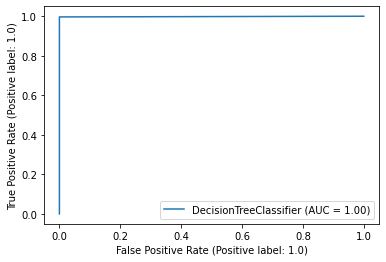

In [6]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
model_dt.fit(x_train, y_train)
joblib.dump(model_dt,"model_dt")

#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model_dt,x_test, y_test))

# RANDOM FOREST

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
[[616   0]
 [  0 584]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E16646BAF0>


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 a

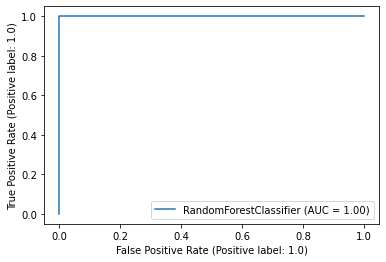

In [7]:
#Random Forest classifier
model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print("ROC curve ",metrics.plot_roc_curve(model_rf,x_test, y_test))

# KNN

KNN
Train Accuracy: 0.999375
Test Accuracy: 0.9983333333333333
Precision Score:  0.9983333333333333
Recall Score:  0.9983333333333333
F1 Score:  0.9983333333333333
Confusion Matrix: 
[[616   0]
 [  2 582]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E166470C70>


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 a

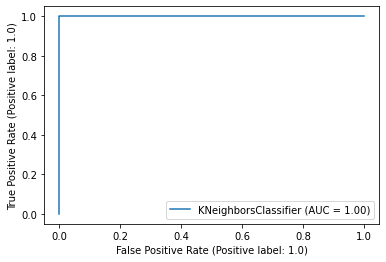

In [8]:
#KNN classifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train, y_train)
#joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(model_knn,x_test, y_test))

# SVM LINEAR

SVM Linear kernel
Train Accuracy: 0.7722916666666667
Test Accuracy: 0.77
Precision Score:  0.77
Recall Score:  0.77
F1 Score:  0.7699999999999999
Confusion Matrix: 
[[364 252]
 [ 24 560]]


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 a

ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E16651B100>


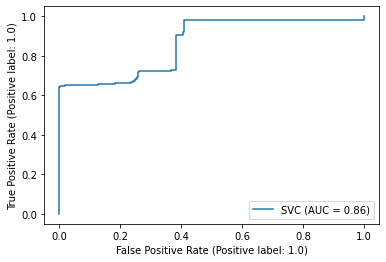

In [9]:
#svm classifier
model_svm = svm.SVC(kernel='linear') # Linear Kernel
model_svm.fit(x_train, y_train)
joblib.dump(model_svm,"model_svm")
y_pred4 = model_svm.predict(x_test)
print("SVM Linear kernel")
print("Train Accuracy:",model_svm.score(x_train, y_train))
print("Test Accuracy:",model_svm.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4,))
print("ROC curve ",metrics.plot_roc_curve(model_svm,x_test, y_test))

# GAUSSIAN NAIVE BAYES 

Gaussian NB
Train Accuracy: 0.996875
Test Accuracy: 0.9958333333333333
Precision Score:  0.9958333333333333
Recall Score:  0.9958333333333333
F1 Score:  0.9958333333333333
Confusion Matrix: 
[[611   5]
 [  0 584]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E16651B0A0>


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 a

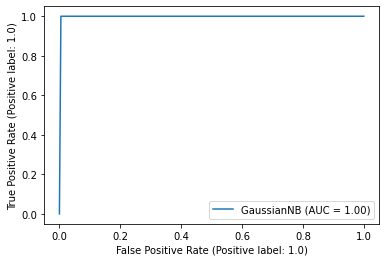

In [10]:
#gaussian naive bayes classifier
model_nb = GaussianNB().fit(x_train, y_train)
joblib.dump(model_nb,"model_nb")
y_pred8 = model_nb.predict(x_test)
print("Gaussian NB")
print("Train Accuracy:",model_nb.score(x_train, y_train))
print("Test Accuracy:",model_nb.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred8,))
print("ROC curve ",metrics.plot_roc_curve(model_nb,x_test, y_test))

# XGBOOST

XGboost
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
[[616   0]
 [  0 584]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001E16A627490>


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 a

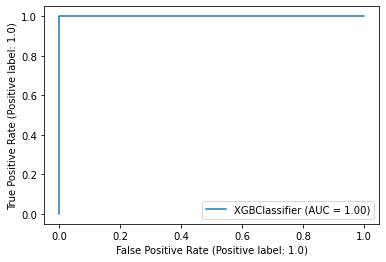

In [11]:
#xgboost classifier
model_xgboost = XGBClassifier().fit(x_train, y_train)
joblib.dump(model_xgboost,"model_xgboost")
y_pred5 = model_xgboost.predict(x_test)
print("XGboost")
print("Train Accuracy:",model_xgboost.score(x_train, y_train))
print("Test Accuracy:",model_xgboost.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5,))
print("ROC curve ",metrics.plot_roc_curve(model_xgboost,x_test, y_test))

# VOTING CLASSIFIER

In [8]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier( estimators=[('DT', model_dt ), ('RF', model_rf),('KNN', model_knn), ('SCVP', model_svm), 
                                           ('GuassianNB', model_nb),('xgboost', model_xgboost)], voting='hard')
model_voting.fit(x_train, y_train)
voting_pred = model_voting.predict(x_test)
joblib.dump(model_voting,"model_voting")
CM = confusion_matrix(y_test, voting_pred)
print("Voting Classifier Hard")
print("Train Accuracy:",model_voting.score(x_train, y_train))
print("Test Accuracy:",model_voting.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("F2 Score: ",metrics.fbeta_score(y_test, voting_pred,pos_label='positive', average='micro',beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, voting_pred,pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, voting_pred))

Voting Classifier Hard
Train Accuracy: 1.0
Test Accuracy: 1.0
Precision Score:  1.0
Recall Score:  1.0
F2 Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
[[616   0]
 [  0 584]]


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

# TESTING

# POSITIVE IMAGES

In [250]:
def gabor_vertical_t(folder_name):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
        #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
        sigma = 2 #Large sigma on small features will fully miss the features. 
        theta = 2*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
        lamda = 1*np.pi /4  #1/4 works best for angled. 
        gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
        #Value of 1, spherical may not be ideal as it picks up features from other regions. 
        phi = 0  #Phase offset. I leave it to 0. 
        
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
        name = 'C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\gabor_p\\v' + str(currentframe) + '.png'
        print ('Creating...' + name)
    
        cv2.imwrite(name, fimg)
        currentframe=currentframe+1;
        

In [252]:
gabor_vertical_t("C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\positive")

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v1.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v2.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v3.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v4.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v5.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v6.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v7.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v8.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v9.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v10.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v11.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v12.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v13.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v14.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v15.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v16.png
Creating...C:\Users\yashl\TY_SEM2

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v139.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v140.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v141.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v142.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v143.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v144.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v145.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v146.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v147.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v148.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v149.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v150.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v151.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v152.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v153.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v154.png
Creating

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v278.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v279.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v280.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v281.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v282.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v283.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v284.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v285.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v286.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v287.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v288.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v289.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v290.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v291.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v292.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v293.png
Creating

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v416.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v417.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v418.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v419.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v420.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v421.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v422.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v423.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v424.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v425.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v426.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v427.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v428.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v429.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v430.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v431.png
Creating

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v553.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v554.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v555.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v556.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v557.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v558.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v559.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v560.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v561.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v562.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v563.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v564.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v565.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v566.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v567.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v568.png
Creating

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v686.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v687.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v688.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v689.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v690.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v691.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v692.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v693.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v694.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v695.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v696.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v697.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v698.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v699.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v700.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\v701.png
Creating

In [257]:
def gabor_horizontal_t(folder_name):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
        #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
        sigma = 2 #Large sigma on small features will fully miss the features. 
        theta = 8*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
        lamda = 1*np.pi /4  #1/4 works best for angled. 
        gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
        #Value of 1, spherical may not be ideal as it picks up features from other regions.
        phi = 0  #Phase offset. I leave it to 0.  
        
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
        name = 'C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\gabor_p\\h\\' + str(currentframe) + '.png'
        print ('Creating...' + name)
    
        cv2.imwrite(name, fimg)
        currentframe=currentframe+1;
        i=i+1
        if i==3000:
            break;

In [258]:
gabor_horizontal_t("C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\positive")

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\1.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\2.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\3.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\4.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\5.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\6.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\7.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\8.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\9.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\10.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\11.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\12.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\13.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\14.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\15.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\16.png
Creating...C:\Use

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\166.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\167.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\168.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\169.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\170.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\171.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\172.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\173.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\174.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\175.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\176.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\177.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\178.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\179.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\180.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\337.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\338.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\339.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\340.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\341.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\342.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\343.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\344.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\345.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\346.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\347.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\348.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\349.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\350.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\351.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\480.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\481.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\482.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\483.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\484.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\485.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\486.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\487.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\488.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\489.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\490.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\491.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\492.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\493.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\494.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\621.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\622.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\623.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\624.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\625.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\626.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\627.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\628.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\629.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\630.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\631.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\632.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\633.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\634.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\635.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_p\h\

In [255]:
csv1_t = "test\gabor_v_t.csv"
csv2_t = "test\gabor_h_t.csv"

# LBP

In [259]:
def lbp_v_t(folder_name):
    i=0
    for filename in os.listdir(folder_name):
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(a, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        hist.reshape(-1)
        j=[]
        # taking only first 18 bins
        for i in range (0,18):
            j.append(hist[i])
        with open(r'test\gabor_v_t.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(j)
            
        i=i+1
        if i==3000:
            break;

In [260]:
lbp_v_t("C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\gabor_p\\v")

C:\Users\yashl\AppData\Local\Temp/ipykernel_19240/4092426447.py:15: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(lbp.ravel())


In [263]:
def lbp_h_t(folder_name):
    i=0
    label=1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(a, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        hist.reshape(-1)
        j=[]
        for i in range (0,18):
            j.append(hist[i])
        j.append(label)
        with open(r'test\gabor_h.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(j)
        i=i+1
        if i==3000:
            break;

In [264]:
lbp_h_t("C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\gabor_p\\h")

C:\Users\yashl\AppData\Local\Temp/ipykernel_19240/1721569626.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(lbp.ravel())


# PCA

In [69]:
v_p_t=pd.read_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\gabor_v_t.csv',header=None)

In [70]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
v_p_t = S.fit_transform(v_p_t)

In [71]:
pca = pickle.load(open('PCA_Model_positive.sav','rb'))

In [72]:
v_p_t = pca.transform(v_p_t)

In [74]:
v_p_t.shape

(800, 9)

In [93]:
v_p_t= pd.DataFrame(v_p_t)
v_p_t

,0,1,2,3,4,5,6,7,8
0,0.252715,0.352301,0.166444,0.220273,0.038579,-0.301807,-0.071319,0.046399,0.083864
1,-0.435227,-0.338084,-0.506339,-0.601601,-0.680553,-0.506839,-0.270317,-0.336425,-0.287697
2,-0.703695,-0.775336,-0.717817,-0.657638,-0.580674,-0.547845,-0.298745,-0.306977,-0.505787
3,-0.619797,-0.614239,-0.737033,-0.732354,-0.820384,-0.978412,-0.526171,-0.969556,-0.861192
4,-0.502343,-0.683316,-0.544784,-0.638959,-0.820384,-0.588851,-0.402982,-0.513113,-0.489632
...,...,...,...,...,...,...,...,...,...
795,-0.326163,-0.200007,-0.429449,-0.582922,-0.500770,-0.383820,-0.374553,-0.203909,-0.215000
796,-0.410058,-0.038917,-0.256448,-0.321417,-0.520746,-0.322310,-0.336649,-0.292253,-0.360393
797,-0.703695,-0.775336,-0.737033,-0.825762,-0.720505,-0.547845,-0.194508,-0.262805,0.301953
798,-0.695308,-0.775336,-0.679340,-0.844434,-0.940246,-1.080935,-0.649366,-1.146244,-0.909657


In [81]:
h_p_t=pd.read_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\gabor_h_t.csv',header=None)

In [82]:
label_t = h_p_t.iloc[: , -1]
label_t

0      1
1      1
2      1
3      1
4      1
      ..
795    1
796    1
797    1
798    1
799    1
Name: 18, Length: 800, dtype: int64

In [83]:
h_p_t = h_p_t.iloc[: , 0:18]
h_p_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.002096,0.000796,0.001009,0.000796,0.000640,0.001067,0.001281,0.001844,0.003105,0.005085,0.006986,0.010441,0.011101,0.025423,0.008617,0.022220,0.005492,0.021134
1,0.000718,0.000291,0.000213,0.000252,0.000213,0.000640,0.000912,0.001184,0.001882,0.003202,0.004619,0.006521,0.007180,0.023424,0.005667,0.022415,0.004638,0.020901
2,0.000019,0.000097,0.000330,0.000485,0.000932,0.000990,0.001261,0.001979,0.002290,0.018902,0.002969,0.019775,0.003241,0.020144,0.003590,0.004599,0.005162,0.005977
3,0.000097,0.000058,0.000039,0.000078,0.000175,0.000155,0.000291,0.000524,0.000718,0.001164,0.002135,0.001979,0.019115,0.002445,0.019639,0.002193,0.019310,0.001669
4,0.000311,0.000155,0.000213,0.000311,0.000175,0.000272,0.000543,0.000970,0.001436,0.001960,0.003357,0.005589,0.006404,0.022822,0.005764,0.021658,0.004231,0.020532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000699,0.000311,0.000291,0.000213,0.000446,0.000582,0.000718,0.001067,0.002174,0.002930,0.004813,0.006443,0.007491,0.023036,0.006191,0.022609,0.004483,0.021852
796,0.000699,0.000408,0.000330,0.000446,0.000524,0.000699,0.000563,0.001281,0.002115,0.002698,0.004735,0.006986,0.006792,0.023812,0.005861,0.021988,0.004852,0.021056
797,0.000019,0.000058,0.000155,0.000602,0.001087,0.000990,0.002989,0.001999,0.020280,0.004192,0.020862,0.003377,0.019892,0.001785,0.001882,0.001979,0.002969,0.003377
798,0.000019,0.000078,0.000039,0.000039,0.000039,0.000039,0.000097,0.000272,0.000408,0.000485,0.000873,0.000912,0.017679,0.001591,0.018184,0.002251,0.019096,0.002542


In [84]:
h_p_t = S.fit_transform(h_p_t)

In [85]:
h_p_t = pca.transform(h_p_t)

In [86]:
h_p_t.shape

(800, 9)

In [90]:
h_p_t= pd.DataFrame(h_p_t)
h_p_t

,0,1,2,3,4,5,6,7,8
0,0.236667,0.278178,0.250990,-0.071435,-0.298110,-0.003642,-0.033869,0.084503,0.148233
1,-0.372148,-0.404616,-0.589736,-0.616275,-0.718657,-0.422617,-0.238644,-0.348846,-0.328503
2,-0.680845,-0.667273,-0.466703,-0.382772,-0.011373,-0.079819,-0.044646,0.173722,-0.169591
3,-0.646557,-0.719778,-0.774299,-0.791428,-0.756889,-0.898725,-0.583529,-0.782195,-0.782537
4,-0.552219,-0.588445,-0.589736,-0.557899,-0.756889,-0.784459,-0.443419,-0.489047,-0.502550
...,...,...,...,...,...,...,...,...,...
795,-0.380722,-0.378355,-0.507714,-0.655192,-0.489268,-0.479750,-0.346421,-0.425319,-0.214995
796,-0.380722,-0.247048,-0.466703,-0.421689,-0.412805,-0.365484,-0.432642,-0.285118,-0.237696
797,-0.680845,-0.719778,-0.651252,-0.266021,0.141553,-0.079819,0.914564,0.186467,6.845237
798,-0.680845,-0.693526,-0.774299,-0.830332,-0.890712,-1.013004,-0.691324,-0.947887,-0.903613


In [91]:
h_p_t=pd.concat([h_p_t, pd.DataFrame(label_t)],axis=1)
h_p_t

,0,1,2,3,4,5,6,7,8,18
0,0.236667,0.278178,0.250990,-0.071435,-0.298110,-0.003642,-0.033869,0.084503,0.148233,1
1,-0.372148,-0.404616,-0.589736,-0.616275,-0.718657,-0.422617,-0.238644,-0.348846,-0.328503,1
2,-0.680845,-0.667273,-0.466703,-0.382772,-0.011373,-0.079819,-0.044646,0.173722,-0.169591,1
3,-0.646557,-0.719778,-0.774299,-0.791428,-0.756889,-0.898725,-0.583529,-0.782195,-0.782537,1
4,-0.552219,-0.588445,-0.589736,-0.557899,-0.756889,-0.784459,-0.443419,-0.489047,-0.502550,1
...,...,...,...,...,...,...,...,...,...,...
795,-0.380722,-0.378355,-0.507714,-0.655192,-0.489268,-0.479750,-0.346421,-0.425319,-0.214995,1
796,-0.380722,-0.247048,-0.466703,-0.421689,-0.412805,-0.365484,-0.432642,-0.285118,-0.237696,1
797,-0.680845,-0.719778,-0.651252,-0.266021,0.141553,-0.079819,0.914564,0.186467,6.845237,1
798,-0.680845,-0.693526,-0.774299,-0.830332,-0.890712,-1.013004,-0.691324,-0.947887,-0.903613,1


In [94]:
final_p_t=pd.concat([v_p_t, h_p_t], axis=1)
final_lbp_positive_t=final_p_t.to_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\final_lbp_positive_t.csv', mode='w',header=False,index=False)

# FINAL POSITIVE DATA

In [95]:
final_p_t

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,18
0,0.252715,0.352301,0.166444,0.220273,0.038579,-0.301807,-0.071319,0.046399,0.083864,0.236667,0.278178,0.250990,-0.071435,-0.298110,-0.003642,-0.033869,0.084503,0.148233,1
1,-0.435227,-0.338084,-0.506339,-0.601601,-0.680553,-0.506839,-0.270317,-0.336425,-0.287697,-0.372148,-0.404616,-0.589736,-0.616275,-0.718657,-0.422617,-0.238644,-0.348846,-0.328503,1
2,-0.703695,-0.775336,-0.717817,-0.657638,-0.580674,-0.547845,-0.298745,-0.306977,-0.505787,-0.680845,-0.667273,-0.466703,-0.382772,-0.011373,-0.079819,-0.044646,0.173722,-0.169591,1
3,-0.619797,-0.614239,-0.737033,-0.732354,-0.820384,-0.978412,-0.526171,-0.969556,-0.861192,-0.646557,-0.719778,-0.774299,-0.791428,-0.756889,-0.898725,-0.583529,-0.782195,-0.782537,1
4,-0.502343,-0.683316,-0.544784,-0.638959,-0.820384,-0.588851,-0.402982,-0.513113,-0.489632,-0.552219,-0.588445,-0.589736,-0.557899,-0.756889,-0.784459,-0.443419,-0.489047,-0.502550,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.326163,-0.200007,-0.429449,-0.582922,-0.500770,-0.383820,-0.374553,-0.203909,-0.215000,-0.380722,-0.378355,-0.507714,-0.655192,-0.489268,-0.479750,-0.346421,-0.425319,-0.214995,1
796,-0.410058,-0.038917,-0.256448,-0.321417,-0.520746,-0.322310,-0.336649,-0.292253,-0.360393,-0.380722,-0.247048,-0.466703,-0.421689,-0.412805,-0.365484,-0.432642,-0.285118,-0.237696,1
797,-0.703695,-0.775336,-0.737033,-0.825762,-0.720505,-0.547845,-0.194508,-0.262805,0.301953,-0.680845,-0.719778,-0.651252,-0.266021,0.141553,-0.079819,0.914564,0.186467,6.845237,1
798,-0.695308,-0.775336,-0.679340,-0.844434,-0.940246,-1.080935,-0.649366,-1.146244,-0.909657,-0.680845,-0.693526,-0.774299,-0.830332,-0.890712,-1.013004,-0.691324,-0.947887,-0.903613,1


# NEGATIVE

# GABOR FILTER

In [275]:
def gabor_vertical_n_t(folder_name):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
        #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
        sigma = 2 #Large sigma on small features will fully miss the features. 
        theta = 2*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
        lamda = 1*np.pi /4  #1/4 works best for angled. 
        gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
        #Value of 1, spherical may not be ideal as it picks up features from other regions. 
        phi = 0  #Phase offset. I leave it to 0. 
        
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
        name = 'C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\gabor_n\\v\\' + str(currentframe) + '.png'
        print ('Creating...' + name)
    
        cv2.imwrite(name, fimg)
        currentframe=currentframe+1;
        i=i+1
        if i==3000:
            break;

In [276]:
def gabor_horizontal_n_t(folder_name):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
        #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
        sigma = 2 #Large sigma on small features will fully miss the features. 
        theta = 8*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
        lamda = 1*np.pi /4  #1/4 works best for angled. 
        gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
        #Value of 1, spherical may not be ideal as it picks up features from other regions.
        phi = 0  #Phase offset. I leave it to 0.  
        
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
        name = 'C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\gabor_n\\h\\' + str(currentframe) + '.png'
        print ('Creating...' + name)
    
        cv2.imwrite(name, fimg)
        currentframe=currentframe+1;
        i=i+1
        if i==3000:
            break;

In [277]:
gabor_vertical_n_t("C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\negative")

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\1.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\2.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\3.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\4.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\5.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\6.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\7.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\8.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\9.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\10.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\11.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\12.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\13.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\14.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\15.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\16.png
Creating...C:\Use

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\134.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\135.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\136.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\137.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\138.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\139.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\140.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\141.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\142.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\143.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\144.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\145.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\146.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\147.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\148.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\271.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\272.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\273.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\274.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\275.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\276.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\277.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\278.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\279.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\280.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\281.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\282.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\283.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\284.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\285.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\414.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\415.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\416.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\417.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\418.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\419.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\420.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\421.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\422.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\423.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\424.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\425.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\426.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\427.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\428.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\554.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\555.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\556.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\557.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\558.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\559.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\560.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\561.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\562.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\563.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\564.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\565.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\566.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\567.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\568.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\686.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\687.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\688.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\689.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\690.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\691.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\692.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\693.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\694.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\695.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\696.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\697.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\698.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\699.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\700.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\v\

In [278]:
gabor_horizontal_n_t("C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\negative")

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\1.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\2.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\3.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\4.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\5.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\6.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\7.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\8.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\9.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\10.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\11.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\12.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\13.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\14.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\15.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\16.png
Creating...C:\Use

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\160.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\161.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\162.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\163.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\164.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\165.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\166.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\167.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\168.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\169.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\170.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\171.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\172.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\173.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\174.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\298.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\299.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\300.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\301.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\302.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\303.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\304.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\305.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\306.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\307.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\308.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\309.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\310.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\311.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\312.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\465.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\466.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\467.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\468.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\469.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\470.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\471.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\472.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\473.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\474.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\475.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\476.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\477.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\478.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\479.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\

Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\627.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\628.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\629.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\630.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\631.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\632.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\633.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\634.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\635.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\636.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\637.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\638.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\639.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\640.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\641.png
Creating...C:\Users\yashl\TY_SEM2\ML\testing\gabor_n\h\

# LBP

In [279]:
def lbp_v_n_t(folder_name):
    i=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(a, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        hist.reshape(-1)
        j=[]
        # taking only first 9 bins
        for i in range (0,9):
            j.append(hist[i])
        with open(r'test\gabor_v_n_t.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(j)
            
        i=i+1
        if i==3000:
            break;

In [280]:
def lbp_h_n_t(folder_name):
    i=0
    label=0
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        radius = 3
        # Number of points to be considered as neighbourers 
        no_points = 8 * radius
        # Uniform LBP is used
        lbp = local_binary_pattern(a, no_points, radius, method='uniform')
        # Calculate the histogram
        x = itemfreq(lbp.ravel())
        # Normalize the histogram
        hist = x[:, 1]/sum(x[:, 1])
        hist.reshape(-1)
        j=[]
        for i in range (0,9):
            j.append(hist[i])
        j.append(label)
        with open(r'test\gabor_h_n_t.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(j)
        i=i+1
        if i==3000:
            break;

In [281]:
lbp_v_n_t("C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\gabor_n\\v")

C:\Users\yashl\AppData\Local\Temp/ipykernel_19240/3444059198.py:15: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(lbp.ravel())


In [282]:
lbp_h_n_t("C:\\Users\\yashl\\TY_SEM2\\ML\\testing\\gabor_n\\h")

C:\Users\yashl\AppData\Local\Temp/ipykernel_19240/364529987.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(lbp.ravel())


In [283]:
v_n_t = pd.read_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\gabor_v_n_t.csv',header=None)

In [284]:
v_n_t=pd.DataFrame(v_n_t)
v_n_t = v_n_t.iloc[: , 0:9]

In [285]:
v_n_t

,0,1,2,3,4,5,6,7,8
0,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
1,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
2,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
3,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
4,0.000078,0.000175,0.000233,0.000213,0.000116,0.000019,0.017175,0.000136,0.017252
...,...,...,...,...,...,...,...,...,...
795,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155
796,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
797,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835
798,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835


In [286]:
h_n_t = pd.read_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\gabor_h_n_t.csv',header=None)

In [287]:
h_n_t=pd.DataFrame(h_n_t)
h_n_t = h_n_t.iloc[: , 0:10]

In [288]:
h_n_t

,0,1,2,3,4,5,6,7,8,9
0,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
1,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
2,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
3,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
4,0.000078,0.000175,0.000252,0.000155,0.000097,0.000078,0.017214,0.000058,0.017330,0
...,...,...,...,...,...,...,...,...,...,...
795,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
796,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0
797,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
798,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0


In [290]:
final_n_t=pd.concat([v_n_t, h_n_t], axis=1)
final_lbp_negative_t=final_n_t.to_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\final_lbp_negative_t.csv', mode='w',header=False,index=False)

# FINAL NEGATIVE DATA

In [291]:
final_n_t

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
0,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
1,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
2,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
3,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
4,0.000078,0.000175,0.000233,0.000213,0.000116,0.000019,0.017175,0.000136,0.017252,0.000078,0.000175,0.000252,0.000155,0.000097,0.000078,0.017214,0.000058,0.017330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
796,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0
797,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0
798,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0


# COMBINING POSITIVE + NEGATIVE

In [96]:
f_p_t = pd.read_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\final_lbp_positive_t.csv',header=None,dtype='float64')


f_p_t=f_p_t.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
f_p_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.252715,0.352301,0.166444,0.220273,0.038579,-0.301807,-0.071319,0.046399,0.083864,0.236667,0.278178,0.250990,-0.071435,-0.298110,-0.003642,-0.033869,0.084503,0.148233,1.0
1,-0.435227,-0.338084,-0.506339,-0.601601,-0.680553,-0.506839,-0.270317,-0.336425,-0.287697,-0.372148,-0.404616,-0.589736,-0.616275,-0.718657,-0.422617,-0.238644,-0.348846,-0.328503,1.0
2,-0.703695,-0.775336,-0.717817,-0.657638,-0.580674,-0.547845,-0.298745,-0.306977,-0.505787,-0.680845,-0.667273,-0.466703,-0.382772,-0.011373,-0.079819,-0.044646,0.173722,-0.169591,1.0
3,-0.619797,-0.614239,-0.737033,-0.732354,-0.820384,-0.978412,-0.526171,-0.969556,-0.861192,-0.646557,-0.719778,-0.774299,-0.791428,-0.756889,-0.898725,-0.583529,-0.782195,-0.782537,1.0
4,-0.502343,-0.683316,-0.544784,-0.638959,-0.820384,-0.588851,-0.402982,-0.513113,-0.489632,-0.552219,-0.588445,-0.589736,-0.557899,-0.756889,-0.784459,-0.443419,-0.489047,-0.502550,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.326163,-0.200007,-0.429449,-0.582922,-0.500770,-0.383820,-0.374553,-0.203909,-0.215000,-0.380722,-0.378355,-0.507714,-0.655192,-0.489268,-0.479750,-0.346421,-0.425319,-0.214995,1.0
796,-0.410058,-0.038917,-0.256448,-0.321417,-0.520746,-0.322310,-0.336649,-0.292253,-0.360393,-0.380722,-0.247048,-0.466703,-0.421689,-0.412805,-0.365484,-0.432642,-0.285118,-0.237696,1.0
797,-0.703695,-0.775336,-0.737033,-0.825762,-0.720505,-0.547845,-0.194508,-0.262805,0.301953,-0.680845,-0.719778,-0.651252,-0.266021,0.141553,-0.079819,0.914564,0.186467,6.845237,1.0
798,-0.695308,-0.775336,-0.679340,-0.844434,-0.940246,-1.080935,-0.649366,-1.146244,-0.909657,-0.680845,-0.693526,-0.774299,-0.830332,-0.890712,-1.013004,-0.691324,-0.947887,-0.903613,1.0


In [97]:
f_n_t = pd.read_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\final_lbp_negative_t.csv',header=None,dtype='float64')


f_n_t=f_n_t.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
f_n_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
1,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
2,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
3,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
4,0.000078,0.000175,0.000233,0.000213,0.000116,0.000019,0.017175,0.000136,0.017252,0.000078,0.000175,0.000252,0.000155,0.000097,0.000078,0.017214,0.000058,0.017330,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
796,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0.0
797,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
798,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0


In [98]:
final_lbp_t=f_p_t.append(f_n_t)

In [99]:
final_lbp_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.252715,0.352301,0.166444,0.220273,0.038579,-0.301807,-0.071319,0.046399,0.083864,0.236667,0.278178,0.250990,-0.071435,-0.298110,-0.003642,-0.033869,0.084503,0.148233,1.0
1,-0.435227,-0.338084,-0.506339,-0.601601,-0.680553,-0.506839,-0.270317,-0.336425,-0.287697,-0.372148,-0.404616,-0.589736,-0.616275,-0.718657,-0.422617,-0.238644,-0.348846,-0.328503,1.0
2,-0.703695,-0.775336,-0.717817,-0.657638,-0.580674,-0.547845,-0.298745,-0.306977,-0.505787,-0.680845,-0.667273,-0.466703,-0.382772,-0.011373,-0.079819,-0.044646,0.173722,-0.169591,1.0
3,-0.619797,-0.614239,-0.737033,-0.732354,-0.820384,-0.978412,-0.526171,-0.969556,-0.861192,-0.646557,-0.719778,-0.774299,-0.791428,-0.756889,-0.898725,-0.583529,-0.782195,-0.782537,1.0
4,-0.502343,-0.683316,-0.544784,-0.638959,-0.820384,-0.588851,-0.402982,-0.513113,-0.489632,-0.552219,-0.588445,-0.589736,-0.557899,-0.756889,-0.784459,-0.443419,-0.489047,-0.502550,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
796,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0.0
797,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
798,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0


In [100]:
final_lbp_t=final_lbp_t.to_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\final_lbp_t.csv', mode='a', header=False,index=False)

In [102]:
data= pd.read_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\final_lbp_t.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.252715,0.352301,0.166444,0.220273,0.038579,-0.301807,-0.071319,0.046399,0.083864,0.236667,0.278178,0.250990,-0.071435,-0.298110,-0.003642,-0.033869,0.084503,0.148233,1.0
1,-0.435227,-0.338084,-0.506339,-0.601601,-0.680553,-0.506839,-0.270317,-0.336425,-0.287697,-0.372148,-0.404616,-0.589736,-0.616275,-0.718657,-0.422617,-0.238644,-0.348846,-0.328503,1.0
2,-0.703695,-0.775336,-0.717817,-0.657638,-0.580674,-0.547845,-0.298745,-0.306977,-0.505787,-0.680845,-0.667273,-0.466703,-0.382772,-0.011373,-0.079819,-0.044646,0.173722,-0.169591,1.0
3,-0.619797,-0.614239,-0.737033,-0.732354,-0.820384,-0.978412,-0.526171,-0.969556,-0.861192,-0.646557,-0.719778,-0.774299,-0.791428,-0.756889,-0.898725,-0.583529,-0.782195,-0.782537,1.0
4,-0.502343,-0.683316,-0.544784,-0.638959,-0.820384,-0.588851,-0.402982,-0.513113,-0.489632,-0.552219,-0.588445,-0.589736,-0.557899,-0.756889,-0.784459,-0.443419,-0.489047,-0.502550,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
1596,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.000155,0.0
1597,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0
1598,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.000078,0.000155,0.000233,0.000155,0.000078,0.017155,0.017155,0.017155,0.947835,0.0


In [103]:
x = data.iloc[:,0:18].values
y = data.iloc[:,18].values

In [104]:
x

array([[ 2.52714512e-01,  3.52301461e-01,  1.66443757e-01, ...,
        -3.38687015e-02,  8.45030193e-02,  1.48232696e-01],
       [-4.35226918e-01, -3.38084228e-01, -5.06338904e-01, ...,
        -2.38644052e-01, -3.48845798e-01, -3.28503177e-01],
       [-7.03694698e-01, -7.75336263e-01, -7.17817311e-01, ...,
        -4.46463515e-02,  1.73721893e-01, -1.69591219e-01],
       ...,
       [ 7.76000000e-05,  1.55252382e-04,  2.32878573e-04, ...,
         1.71553882e-02,  1.71553882e-02,  9.47835200e-01],
       [ 7.76000000e-05,  1.55252382e-04,  2.32878573e-04, ...,
         1.71553882e-02,  1.71553882e-02,  9.47835200e-01],
       [ 7.76000000e-05,  1.55252382e-04,  2.32878573e-04, ...,
         1.71553882e-02,  1.71553882e-02,  9.47835200e-01]])

In [105]:
y

array([1., 1., 1., ..., 0., 0., 0.])

# PCA

In [106]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [107]:
Dhoni

array([[ 3.57103669e-01,  4.98005239e-01,  2.35092022e-01, ...,
        -5.79743256e-02,  1.09951218e-01, -1.43063874e-01],
       [-6.15786909e-01, -4.78346377e-01, -7.16364756e-01, ...,
        -3.47549880e-01, -5.02854039e-01, -7.21131721e-01],
       [-9.95455528e-01, -1.09671338e+00, -1.01543989e+00, ...,
        -7.32151443e-02,  2.36117007e-01, -5.28442439e-01],
       ...,
       [-1.76850751e-04, -4.09875895e-06,  3.47356318e-05, ...,
         1.41795203e-02,  1.47138929e-02,  8.26497103e-01],
       [-1.76850751e-04, -4.09875895e-06,  3.47356318e-05, ...,
         1.41795203e-02,  1.47138929e-02,  8.26497103e-01],
       [-1.76850751e-04, -4.09875895e-06,  3.47356318e-05, ...,
         1.41795203e-02,  1.47138929e-02,  8.26497103e-01]])

In [108]:
pca = pickle.load(open('PCA_Model.sav','rb'))

In [109]:
Bhumi = pca.transform(Dhoni)

In [110]:
Bhumi.shape

(1600, 13)

In [111]:
B1= pd.DataFrame(Bhumi)
B1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.153136,0.382299,0.094736,0.116512,0.088159,0.447311,-0.138380,0.133668,0.588341,0.332525,0.066663,0.061265,-0.111448
1,-2.001319,0.692741,-0.160840,-0.888423,-0.192771,-0.923621,-0.990543,-0.494902,0.084262,-0.827608,-0.395382,-0.131284,0.163821
2,-1.230685,0.669247,-0.701518,-1.214917,-0.454717,-1.255202,-0.791457,-0.606546,-0.159234,-1.024900,-1.084626,0.248807,0.182999
3,-3.180057,1.595356,-0.255772,-1.533006,-0.298246,-1.234389,-1.206255,-0.417691,0.524338,-1.735037,-0.425478,-0.415529,0.040830
4,-2.541078,1.001053,-0.399482,-1.272654,-0.044851,-1.053893,-1.023413,-0.551487,0.021787,-1.217054,-0.309546,-0.183923,0.045593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.177164,-0.275718,-0.029343,-0.004683,0.006808,0.000068,0.000415,0.001225,-0.022841,0.010684,-0.423605,-0.369858,-0.601435
1596,-0.038081,-0.404039,0.083619,0.012721,-0.016234,0.000028,0.000963,0.003689,0.054464,-0.038424,0.513504,0.348690,0.472991
1597,0.197124,-1.102341,0.091401,-0.000944,-0.009476,-0.000996,-0.001603,0.007260,0.097911,-0.078499,0.176223,-0.050330,-0.232359
1598,0.197124,-1.102341,0.091401,-0.000944,-0.009476,-0.000996,-0.001603,0.007260,0.097911,-0.078499,0.176223,-0.050330,-0.232359


In [112]:
B2=pd.concat([B1, pd.DataFrame(y)],axis=1)
B2

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.153136,0.382299,0.094736,0.116512,0.088159,0.447311,-0.138380,0.133668,0.588341,0.332525,0.066663,0.061265,-0.111448,1.0
1,-2.001319,0.692741,-0.160840,-0.888423,-0.192771,-0.923621,-0.990543,-0.494902,0.084262,-0.827608,-0.395382,-0.131284,0.163821,1.0
2,-1.230685,0.669247,-0.701518,-1.214917,-0.454717,-1.255202,-0.791457,-0.606546,-0.159234,-1.024900,-1.084626,0.248807,0.182999,1.0
3,-3.180057,1.595356,-0.255772,-1.533006,-0.298246,-1.234389,-1.206255,-0.417691,0.524338,-1.735037,-0.425478,-0.415529,0.040830,1.0
4,-2.541078,1.001053,-0.399482,-1.272654,-0.044851,-1.053893,-1.023413,-0.551487,0.021787,-1.217054,-0.309546,-0.183923,0.045593,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.177164,-0.275718,-0.029343,-0.004683,0.006808,0.000068,0.000415,0.001225,-0.022841,0.010684,-0.423605,-0.369858,-0.601435,0.0
1596,-0.038081,-0.404039,0.083619,0.012721,-0.016234,0.000028,0.000963,0.003689,0.054464,-0.038424,0.513504,0.348690,0.472991,0.0
1597,0.197124,-1.102341,0.091401,-0.000944,-0.009476,-0.000996,-0.001603,0.007260,0.097911,-0.078499,0.176223,-0.050330,-0.232359,0.0
1598,0.197124,-1.102341,0.091401,-0.000944,-0.009476,-0.000996,-0.001603,0.007260,0.097911,-0.078499,0.176223,-0.050330,-0.232359,0.0


In [113]:
csv_data_t1=B2.to_csv('C:\\Users\\yashl\\TY_SEM2\\ML\\test\\FinalPCAFV.csv', mode='a',header=False,index=False)

In [114]:
data2= pd.read_csv(r'C:\\Users\\yashl\\TY_SEM2\\ML\\test\\FinalPCAFV.csv',header=None)
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.153136,0.382299,0.094736,0.116512,0.088159,0.447311,-0.138380,0.133668,0.588341,0.332525,0.066663,0.061265,-0.111448,1.0
1,-2.001319,0.692741,-0.160840,-0.888423,-0.192771,-0.923621,-0.990543,-0.494902,0.084262,-0.827608,-0.395382,-0.131284,0.163821,1.0
2,-1.230685,0.669247,-0.701518,-1.214917,-0.454717,-1.255202,-0.791457,-0.606546,-0.159234,-1.024900,-1.084626,0.248807,0.182999,1.0
3,-3.180057,1.595356,-0.255772,-1.533006,-0.298246,-1.234389,-1.206255,-0.417691,0.524338,-1.735037,-0.425478,-0.415529,0.040830,1.0
4,-2.541078,1.001053,-0.399482,-1.272654,-0.044851,-1.053893,-1.023413,-0.551487,0.021787,-1.217054,-0.309546,-0.183923,0.045593,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.177164,-0.275718,-0.029343,-0.004683,0.006808,0.000068,0.000415,0.001225,-0.022841,0.010684,-0.423605,-0.369858,-0.601435,0.0
1596,-0.038081,-0.404039,0.083619,0.012721,-0.016234,0.000028,0.000963,0.003689,0.054464,-0.038424,0.513504,0.348690,0.472991,0.0
1597,0.197124,-1.102341,0.091401,-0.000944,-0.009476,-0.000996,-0.001603,0.007260,0.097911,-0.078499,0.176223,-0.050330,-0.232359,0.0
1598,0.197124,-1.102341,0.091401,-0.000944,-0.009476,-0.000996,-0.001603,0.007260,0.097911,-0.078499,0.176223,-0.050330,-0.232359,0.0


In [115]:
#assigning x the columns from 1 to 28 for training
x1 = data2.iloc[:,0:13].values
print("X values")
print(x1)

#assigning y with the column "Class" as target variable
y1 = data2.iloc[:,13]
print("Y values")
print(y1)

X values
[[ 0.15313639  0.38229872  0.09473588 ...  0.06666276  0.06126475
  -0.11144812]
 [-2.00131927  0.69274109 -0.16084032 ... -0.39538234 -0.13128432
   0.16382145]
 [-1.23068532  0.66924704 -0.70151753 ... -1.08462587  0.2488073
   0.18299944]
 ...
 [ 0.1971238  -1.10234083  0.09140135 ...  0.17622307 -0.05033032
  -0.23235912]
 [ 0.1971238  -1.10234083  0.09140135 ...  0.17622307 -0.05033032
  -0.23235912]
 [ 0.1971238  -1.10234083  0.09140135 ...  0.17622307 -0.05033032
  -0.23235912]]
Y values
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1595    0.0
1596    0.0
1597    0.0
1598    0.0
1599    0.0
Name: 13, Length: 1600, dtype: float64


# DECISION TREE

In [116]:
model_dt = joblib.load("model_dt")
y_dt = model_dt.predict(x1)
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y1, y_dt)*100,"%")

Decision Tree Results
Decision Tree Accuracy:  99.375 %


# RANDOM FOREST

In [117]:
model_rf = joblib.load("model_rf")
y_rf = model_rf.predict(x1)
print("Random Forest Clasifier")
print("Random Forest Clasifier: ",accuracy_score(y1, y_rf)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_rf, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_rf, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_rf, pos_label='positive', average='micro'))

Random Forest Clasifier
Random Forest Clasifier:  100.0 %
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# KNN 

In [118]:
model_knn = joblib.load("model_knn")
y_knn = model_knn.predict(x1)
print("KNN")
print("KNN: ",accuracy_score(y1, y_knn)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_knn, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_knn, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_knn, pos_label='positive', average='micro'))

KNN
KNN:  96.6875 %
Precision Score:  0.966875
Recall Score:  0.966875
F1 Score:  0.966875


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM LINEAR

In [119]:
model_svm = joblib.load("model_svm")
y_svm = model_svm.predict(x1)
print("SVM")
print("SVM: ",accuracy_score(y1, y_svm)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_svm, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_svm, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_svm, pos_label='positive', average='micro'))

SVM
SVM:  71.375 %
Precision Score:  0.71375
Recall Score:  0.71375
F1 Score:  0.7137500000000001


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# GUASSIAN NB

In [120]:
model_nb = joblib.load("model_nb")
y_nb = model_nb.predict(x1)
print("Guassian NB")
print("Guassian NB: ",accuracy_score(y1, y_nb)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_nb, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_nb, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_nb, pos_label='positive', average='micro'))

Guassian NB
Guassian NB:  99.625 %
Precision Score:  0.99625
Recall Score:  0.99625
F1 Score:  0.99625


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# XGBOOST

In [121]:
model_xgboost = joblib.load("model_xgboost")
y_xgboost = model_xgboost.predict(x1)
print("XGBOOST")
print("XGBOOST: ",accuracy_score(y1, y_xgboost)*100,"%")
print("Precision Score: ",metrics.precision_score(y1, y_xgboost, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y1, y_xgboost, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y1, y_xgboost, pos_label='positive', average='micro'))

XGBOOST
XGBOOST:  99.5625 %
Precision Score:  0.995625
Recall Score:  0.995625
F1 Score:  0.995625


C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\yashl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
